<a href="https://colab.research.google.com/github/Ian326/TI3001C/blob/main/E5_Construcci%C3%B3n_y_transformaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recolección y descripción de datos
---
***Equipo:***

**Ruth Jiménez Vázquez - A01351923**

**José Ignacio Gómez Moreno - A01067362**

**Harry Hernández Grande - A01736341**

**Ian Joab Padrón Corona - A01708940**

---



## Carga de datos

In [365]:
import pandas as pd
import numpy as np
import missingno as msno

In [366]:
print(pd.read_csv('../content/vista_repdetail_tec.csv', low_memory=False).info())
# Como se puede observar, el csv no contiene el nombre de las columnas a utilizar
# Por tanto se debera asignar manualmente el nombre de las columnas
# segun el diccionario de datos proporcionado por el cliente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195635 entries, 0 to 195634
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   166140                                                        195635 non-null  int64  
 1   MEX                                                           195635 non-null  object 
 2   MEX-00024316                                                  195635 non-null  object 
 3   691550.000000                                                 135429 non-null  float64
 4   2022-01-07 11:13:00.000                                       195635 non-null  object 
 5   2022-01-07 11:14:00.000                                       193711 non-null  object 
 6   CLOSED                                                        195635 non-null  object 
 7   0                                                       

In [367]:
# Columnas dadas en el Diccionario de Datos proporcionado
columns = [
    "Column", "Taller", "OrderID", "kMS", "OpenedDate", "ClosedDate", "Status",
    "lagdias", "laghoras", "ClosedDay", "ClosedMonth", "ClosedYear", "OpenedDay",
    "OpenedMonth", "OpenedYear", "CreatedBy", "ClosedBy", "RepReason",
    "OrderType", "Supplier", "COMPCDKEY", "COMPCODE", "DESCRIP", "QTYRCVD",
    "QTYREQD", "CHGAMT", "TAXAMT", "SUBTOTAL", "TOTAL", "UnitID", "UnitType",
    "UnitYear", "EC", "Flota", "ReasonType", "COMPLAINT", "Jobcode", "TipoLinea",
    "NumParte", "FechaPromesa", "Estimate", "CompleteDay", "CompleteMonth",
    "CompleteYear", "CompleteDate", "MECHANIC", "CITA"
]

data = pd.read_csv('../content/vista_repdetail_tec.csv', names=columns, low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195636 entries, 0 to 195635
Data columns (total 47 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Column         195636 non-null  int64  
 1   Taller         195636 non-null  object 
 2   OrderID        195636 non-null  object 
 3   kMS            135430 non-null  float64
 4   OpenedDate     195636 non-null  object 
 5   ClosedDate     193712 non-null  object 
 6   Status         195636 non-null  object 
 7   lagdias        193712 non-null  float64
 8   laghoras       193712 non-null  float64
 9   ClosedDay      193712 non-null  float64
 10  ClosedMonth    193712 non-null  object 
 11  ClosedYear     193712 non-null  float64
 12  OpenedDay      195636 non-null  int64  
 13  OpenedMonth    195636 non-null  object 
 14  OpenedYear     195636 non-null  int64  
 15  CreatedBy      195636 non-null  object 
 16  ClosedBy       191748 non-null  object 
 17  RepReason      195636 non-nul

In [368]:
data.sample(3)

,Column,Taller,OrderID,kMS,OpenedDate,ClosedDate,Status,lagdias,laghoras,ClosedDay,...,TipoLinea,NumParte,FechaPromesa,Estimate,CompleteDay,CompleteMonth,CompleteYear,CompleteDate,MECHANIC,CITA
96187,261872,MEX,MEX-00041858,391335.0,2023-06-01 09:55:00.000,2023-06-12 14:11:00.000,CLOSED,11.0,269.0,12.0,...,PART,WL8022,2023-06-10 16:00:00.000,NaN,11.0,June,2023.0,2023-06-11 12:21:00,NaN,
161236,307769,QRO,QRO-00045180,NaN,2024-05-02 08:53:00.000,2024-06-02 10:06:00.000,CLOSED,31.0,746.0,2.0,...,PART,RFTRA444,2024-05-31 18:00:00.000,NaN,31.0,May,2024.0,2024-05-31 18:00:00,NaN,CITA A TIEMP
181619,319771,SLP,SLP-00001367,NaN,2024-07-26 12:05:00.000,2024-08-01 17:09:00.000,CLOSED,6.0,149.0,1.0,...,SERVICES,NaN,2024-07-27 13:00:00.000,NaN,29.0,July,2024.0,2024-07-29 08:50:00,NaN,SIN CITA


## Documentacion de los esquemas de datos

* ¿Cuál es nuestra fuente de datos?

Actualmente, la informacion es recabada por nuestro SocioFormador TDR. Tenemos acceso a un escritorio remoto que esta a su vez conectado con un servidor de Microsoft SQL Server.

A partir de dicho servidor, llamamos a una de las vistas a las que nos dieron acceso, para recabar toda la informacion sobre las reparaciones de su flota.


* ¿Cómo obtenemos la información?

A traves de una Query de SQL a la que nos autorizaron, que seria la siguiente:


```
SELECT * FROM [TMWSuite].[dbo].[vista_repdetail_tec]
```




## Diccionario de datos

| Column        | Descripción                                                                                       |
| ------------- | ------------------------------------------------------------------------------------------------- |
| OrderID       | ID de la orden de reparación                                                                      |
| Taller        | Acrónimo del taller donde se realizó la reparación                                                |
| kMS         | Kilometros viajados por la unidad                                                                     |
| OpenedDate    | Fecha de apertura de la orden de reparación                                                       |
| ClosedDate    | Fecha de cierre de la orden de reparación                                                         |
| Status        | Estatus de la orden de reparación                                                                 |
| lagdias       | Días entre cierre y apertura de la orden de reparación                                            |
| laghoras      | Horas entre cierre y apertura de la orden de reparación                                           |
| ClosedDay     | Día del mes en que se cerró la orden de reparación                                                |
| ClosedMonth   | Mes que se cerró la orden de reparación                                                           |
| ClosedYear    | Año en que se cerró la orden de reparación                                                        |
| OpenedDay     | Día del mes en que se abrió la orden de reparación                                                |
| OpenedMonth   | Mes que se abrió la orden de reparación                                                           |
| OpenedYear    | Año en que se abrió la orden de reparación                                                        |
| CreatedBy     | Usuario que creó la orden de reparación                                                           |
| ClosedBy      | Usuario que cerro la orden de reparación                                                          |
| RepReason     | Razón de reparación                                                                               |
| OrderType     | Tipo de orden. Standar es en uno de nuestros talleres propios. Vendor es con un proveedor externo |
| Supplier      | Proveedor que realizó la reparación                                                               |
| COMPCDKEY     | Codigo de componente (No aporta info importante)                                                  |
| COMPCODE      | Codigo utilizado para identificar el tipo de reparación                                           |
| DESCRIP       | Descripción de la reparación                                                                      |
| QTYRCVD       | Cantidad de piezas o trabajo recibidas                                                            |
| QTYREQD       | Cantidad de piezas o trabajo requeridas                                                           |
| CHGAMT        | Costo unitario                                                                                    |
| TAXAMT        | IVA                                                                                               |
| SUBTOTAL      | Subtotal de la reparación (No incluye IVA)                                                        |
| TOTAL         | Total de la reparación (Incluye IVA)                                                              |
| UnitID        | Numero de unidad                                                                                  |
| UnitType      | Tipo de unidad (Tracto, Caja Seca, Dolly, etc.)                                                   |
| UnitYear      | Año del modelo de la unidad                                                                       |
| EC            | Equipo administrativo que se encarga de la operación de un conjunto de proyectos                  |
| Flota         | Nombre del proyecto en que trabaja el tracto. (Cliente)                                           |
| ReasonType    | Razón (No aporta info importante)                                                                 |
| COMPLAINT     | Queja reportada                                                                                   |
| Jobcode       | Numero para identificar el tipo de reparación                                                     |
| TipoLinea     | Describe el tipo de línea en la orden de reparación (Piezas, mano de obra, servicios, etc.)       |
| NumParte      | Numero de parte descarga en la línea de reparación                                                |
| FechaPromesa  | Fecha de promesa para terminar las reparaciones de la unidad                                      |
| Estimate      | Monto estimado (No lo utilizamos)                                                                 |
| CompleteDay   | Día del mes en que se completó la orden                                                           |
| CompleteMonth | Mes que se completó la orden de reparación                                                        |
| CompleteYear  | Año en que se completó la orden de reparación                                                     |
| CompleteDate  | Fecha en que se completó la orden de reparación                                                   |
| MECHANIC      | Mecánico interno que realizó la reparación                                                        |
| CITA          | Indica si la unidad tenía una cita agenda previamente                                             |

## Analisis de la estructura de los datos

* ¿Que tipo de datos tenemos? **Tenemos 13 de tipo float, 4 int, y 30 object.**
* ¿Requerimos modificar el tipo de datos de alguna columna? **Si, para ser precisos, debemos convertir las siguientes columnas:**
  * **A int64**:
    * lagdias: Son cantidad de dias, no pueden venir con decimales
    * laghoras: Son cantidad de horas, no pueden venir con decimales
    * ClosedDay: Es el numero del dia en que fue cerrada (puede ser de 1 - 31)
    * QTYRCVD: Es una cantidad de piezas, no puede venir con decimales
    * QTYREQD: Es una cantidad de piezas, no puede venir con decimales
    * CompleteDay: Es el numero del dia en que fue cerrada (puede ser de 1 - 31)
    * CompleteYear: Es un año (no puede tener punto decimal o ser un string)
  
  * **A datetime64**
    * OpenedDate: Actualmente es un object, debe ser fecha
    * ClosedDate: Actualmente es un object, debe ser fecha
    * FechaPromesa: Actualmente es un object, debe ser fecha
    * CompleteDate: Actualmente es un object, debe ser fecha

* ¿Existen nulos? **Si, actualmente hay 689,643 registros faltantes en toda la informacion que tenemos**

In [369]:
data.dtypes.head(10)

Column          int64
Taller         object
OrderID        object
kMS           float64
OpenedDate     object
ClosedDate     object
Status         object
lagdias       float64
laghoras      float64
ClosedDay     float64
dtype: object

In [370]:
data.isnull().sum()

Column                0
Taller                0
OrderID               0
kMS               60206
OpenedDate            0
ClosedDate         1924
Status                0
lagdias            1924
laghoras           1924
ClosedDay          1924
ClosedMonth        1924
ClosedYear         1924
OpenedDay             0
OpenedMonth           0
OpenedYear            0
CreatedBy             0
ClosedBy           3888
RepReason             0
OrderType             0
Supplier         124146
COMPCDKEY             0
COMPCODE              0
DESCRIP               0
QTYRCVD               0
QTYREQD               0
CHGAMT                0
TAXAMT                0
SUBTOTAL              0
TOTAL                 0
UnitID                0
UnitType              0
UnitYear              0
EC                   29
Flota                 0
ReasonType         5031
COMPLAINT             0
Jobcode               0
TipoLinea          5031
NumParte          79500
FechaPromesa        409
Estimate         195632
CompleteDay     

In [371]:
data.isnull().sum().sum() # <- Cantidad de nulos

np.int64(689643)

## Perfiles involucrados

*   Equipo de TDR que nos puede ayudar con los datos (Identificar por nombre y cargo)


### Ing. Emmanuel Vargas Pérez

**Jefe de Administración de Equipo**

Nos proporcionará información sobre el proyecto que desarrollaremos (Sayer), incluyendo configuraciones de las flotas de tractocamiones y las fallas más comunes que suelen presentar estos vehículos.






### Ing. Mauricio Romo Ávila

**Subdirector de Mantenimiento**

Nos brindará información sobre el mantenimiento de los tractocamiones, incluyendo las fallas comunes, los costos asociados a estas fallas, las ubicaciones donde ocurren con mayor frecuencia, el número de talleres disponibles (tanto propios como generales), y responderá dudas sobre sus mantenimientos correctivos.


### Ing. Brandon Velazco

**Jefe de Taller**

Aportará información relevante sobre los tractocamiones, incluyendo detalles sobre las partes y componentes específicos que suelen fallar, en qué consisten estas fallas, así como la duración y el costo de las mismas.

*   Los profesores nos brindarán las herramientas y conocimientos
necesarios para lograr las metas y objetivos.

## Limpieza de Indices y Columnas

* ¿Que indices vamos a utilizar?
 **La mejor opcion seria el OrderID, ya que es un valor unico para identificar cada orden de mantenimiento**

* ¿Que columnas requieren un cambio de Tipo de Dato?
  * **A int64**:
      * lagdias: Son cantidad de dias, no pueden venir con decimales
      * laghoras: Son cantidad de horas, no pueden venir con decimales
      * ClosedDay: Es el numero del dia en que fue cerrada (puede ser de 1 - 31)
      * QTYRCVD: Es una cantidad de piezas, no puede venir con decimales
      * QTYREQD: Es una cantidad de piezas, no puede venir con decimales
      * CompleteDay: Es el numero del dia en que fue cerrada (puede ser de 1 - 31)
      * CompleteYear: Es un año (no puede tener punto decimal o ser un string)

    * **A float64**:
      * Estimate: Se encuentra como object actualmente, debe ser un precio en decimal
    
    * **A datetime64**
      * OpenedDate: Actualmente es un object, debe ser fecha
      * ClosedDate: Actualmente es un object, debe ser fecha
      * FechaPromesa: Actualmente es un object, debe ser fecha
      * CompleteDate: Actualmente es un object, debe ser fecha

In [372]:
# Nombrando columna 'OrderID' como índice
data.set_index('OrderID', inplace=True)
data

,Column,Taller,kMS,OpenedDate,ClosedDate,Status,lagdias,laghoras,ClosedDay,ClosedMonth,...,TipoLinea,NumParte,FechaPromesa,Estimate,CompleteDay,CompleteMonth,CompleteYear,CompleteDate,MECHANIC,CITA
OrderID,,,,,,,,,,,,,,,,,,,,,
MEX-00024316,166140,MEX,691550.0,2022-01-07 11:13:00.000,2022-01-07 11:14:00.000,CLOSED,0.0,0.0,7.0,January,...,PART,FF2200,2021-12-10 17:00:00.000,NaN,7.0,January,2022.0,2022-01-07 11:14:00,NaN,CON CITA
MEX-00024316,166140,MEX,691550.0,2022-01-07 11:13:00.000,2022-01-07 11:14:00.000,CLOSED,0.0,0.0,7.0,January,...,PART,AF27958,2021-12-10 17:00:00.000,NaN,7.0,January,2022.0,2022-01-07 11:14:00,NaN,CON CITA
MEX-00024316,166140,MEX,691550.0,2022-01-07 11:13:00.000,2022-01-07 11:14:00.000,CLOSED,0.0,0.0,7.0,January,...,PART,LF14001NN,2021-12-10 17:00:00.000,NaN,7.0,January,2022.0,2022-01-07 11:14:00,NaN,CON CITA
MEX-00024316,166140,MEX,691550.0,2022-01-07 11:13:00.000,2022-01-07 11:14:00.000,CLOSED,0.0,0.0,7.0,January,...,PART,P550853,2021-12-10 17:00:00.000,NaN,7.0,January,2022.0,2022-01-07 11:14:00,NaN,CON CITA
MEX-00024316,166140,MEX,691550.0,2022-01-07 11:13:00.000,2022-01-07 11:14:00.000,CLOSED,0.0,0.0,7.0,January,...,PART,15W-40,2021-12-10 17:00:00.000,NaN,7.0,January,2022.0,2022-01-07 11:14:00,NaN,CON CITA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QRO-00046370,325470,QRO,534606.0,2024-09-04 10:15:00.000,NaN,OPEN,NaN,NaN,NaN,NaN,...,NaN,NaN,2024-09-04 17:00:00.000,NaN,NaN,NaN,NaN,NaN,MECHANIC,NaN
MEX-00060029,325484,MEX,NaN,2024-09-04 11:18:00.000,2024-09-04 11:19:16.000,CANCELED,0.0,0.0,4.0,September,...,NaN,NaN,2024-09-05 00:00:00.000,NaN,NaN,NaN,NaN,NaN,MECHANIC,NaN
MEX-00060032,325489,MEX,NaN,2024-09-04 11:21:00.000,NaN,OPEN,NaN,NaN,NaN,NaN,...,NaN,NaN,2024-09-05 00:00:00.000,NaN,NaN,NaN,NaN,NaN,MECHANIC,NaN


In [373]:
# Convirtiendo tipos de datos a DateTime
data['OpenedDate'] = pd.to_datetime(data['OpenedDate'])
data['ClosedDate'] = pd.to_datetime(data['ClosedDate'])
data['FechaPromesa'] = pd.to_datetime(data['FechaPromesa'])
data['CompleteDate'] = pd.to_datetime(data['CompleteDate'])

In [374]:
# Redondeando todos los decimales a enteros
data['lagdias'] = data['lagdias'].round(0)
data['laghoras'] = data['laghoras'].round(0)
data['ClosedDay'] = data['ClosedDay'].round(0)
data['ClosedYear'] = data['ClosedYear'].round(0)
data['QTYRCVD'] = data['QTYRCVD'].round(0)
data['QTYREQD'] = data['QTYREQD'].round(0)
data['CompleteDay'] = data['CompleteDay'].round(0)
data['CompleteYear'] = data['CompleteYear'].round(0)

In [375]:
# Convirtiendo datos nulos a 0s
data['lagdias'] = data['lagdias'].fillna(0)
data['laghoras'] = data['laghoras'].fillna(0)
data['ClosedDay'] = data['ClosedDay'].fillna(0)
data['ClosedYear'] = data['ClosedYear'].fillna(0)
data['QTYRCVD'] = data['QTYRCVD'].fillna(0)
data['QTYREQD'] = data['QTYREQD'].fillna(0)
data['CompleteDay'] = data['CompleteDay'].fillna(0)
data['CompleteYear'] = data['CompleteYear'].fillna(0)

In [376]:
# Convertir tipos de datos a enteros
data['lagdias'] = data['lagdias'].astype(int)
data['laghoras'] = data['laghoras'].astype(int)
data['ClosedDay'] = data['ClosedDay'].astype(int)
data['ClosedYear'] = data['ClosedYear'].astype(int)
data['QTYRCVD'] = data['QTYRCVD'].astype(int)
data['QTYREQD'] = data['QTYREQD'].astype(int)
data['CompleteDay'] = data['CompleteDay'].astype(int)
data['CompleteYear'] = data['CompleteYear'].astype(int)

In [377]:
# Convertir tipos de datos a float
# data['Estimate'] = data['Estimate'].astype(float)
# No se puede, porque la informacion en la columna 'Estimate' no es realmente un estimado

In [378]:
# Volver a revisar el tipo de dato de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195636 entries, MEX-00024316 to QRO-00046374
Data columns (total 46 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Column         195636 non-null  int64         
 1   Taller         195636 non-null  object        
 2   kMS            135430 non-null  float64       
 3   OpenedDate     195636 non-null  datetime64[ns]
 4   ClosedDate     193712 non-null  datetime64[ns]
 5   Status         195636 non-null  object        
 6   lagdias        195636 non-null  int64         
 7   laghoras       195636 non-null  int64         
 8   ClosedDay      195636 non-null  int64         
 9   ClosedMonth    193712 non-null  object        
 10  ClosedYear     195636 non-null  int64         
 11  OpenedDay      195636 non-null  int64         
 12  OpenedMonth    195636 non-null  object        
 13  OpenedYear     195636 non-null  int64         
 14  CreatedBy      195636 non-null  object  

## Analisis de los datos (Descriptiores Estadisticos)

In [379]:
# Seleccionar sólo las variables relevantes para las estadisticas
data_descript = data[['lagdias', 'laghoras','TOTAL','UnitYear',
                      'RepReason', 'UnitType', 'TipoLinea', 'CITA']]

data_descript.sample(10)

,lagdias,laghoras,TOTAL,UnitYear,RepReason,UnitType,TipoLinea,CITA
OrderID,,,,,,,,
MEX-00042850,4,93,850.00,2018,PM,TRAILER,SERVICES,CON CITA
MEX-00052928,6,148,155.10,2020,PM,TRACTOR,PART,CON CITA
QRO-00040035,1,31,174.78,2019,PM,TRAILER,PART,
QRO-00042923,1,25,46.82,2021,DAÑO OP,TRACTOR,PART,
MEX-00044018,6,149,331.44,2019,PM,TRACTOR,PART,SIN CITA
MEX-00027484,26,634,0.00,2018,ENLLANTADO,TRACTOR,PART,CON CITA
MTY-00002730,2,58,3999.00,2019,PM,TRACTOR,SERVICES,SIN CITA
VIL-00002783,0,3,15544.00,2019,PM,TRACTOR,PART,SIN CITA
MEX-00059335,0,0,100.00,2018,LAVADO,TRAILER,SERVICES,SIN CITA


**Estadística descriptiva de las variables numéricas**

In [380]:
# Estadística descriptiva de las variables numéricas
data_descript.describe()

,lagdias,laghoras,TOTAL,UnitYear
count,195636.000000,195636.000000,195636.000000,195636.000000
mean,6.584984,159.523416,1273.548313,2018.569936
std,13.996067,335.843132,3810.736836,5.840994
min,-4.000000,-93.000000,-651469.230000,1909.000000
25%,0.000000,5.000000,86.000000,2018.000000
50%,2.000000,51.000000,320.000000,2020.000000
75%,7.000000,168.000000,1340.000000,2021.000000
max,651.000000,15627.000000,435075.270000,2025.000000


| Variable numérica | Descripción | Rango | Desviación estándar |
|-----------|-----------|-----------|-----------|
| lagdias    | Días entre cierre y apertura de la orden de reparación   | 655    | Datos no tan dispersos    |
| laghoras    | Horas entre cierre y apertura de la orden de reparación    | 15,720    | Datos muy dispersos    |
| TOTAL    | Total de la reparación (Incluye IVA)   | 1,086,544   | Datos demasiado dispersos   |
| UnitYear    | Año del modelo de la unidad   | 116   | Datos no dispersos   |




*   **lagdias**: Los días de apertura y cierre de una reparación están ligeramente dispersos
*   **laghoras**: Las horas de apertura y cierre de una reparación presentan un gran rango de diferencia entre el valor máximo y mínimo, además de que están muy dispersas.
*   **TOTAL**: El costo total de las reparaciones tienen el rango más amplio, y con una alta desviación estándar.
*   **UnitYear**: Al tratarse de los años del modelo de cada unidad, no se presenta tanta dispersión.





<Axes: >

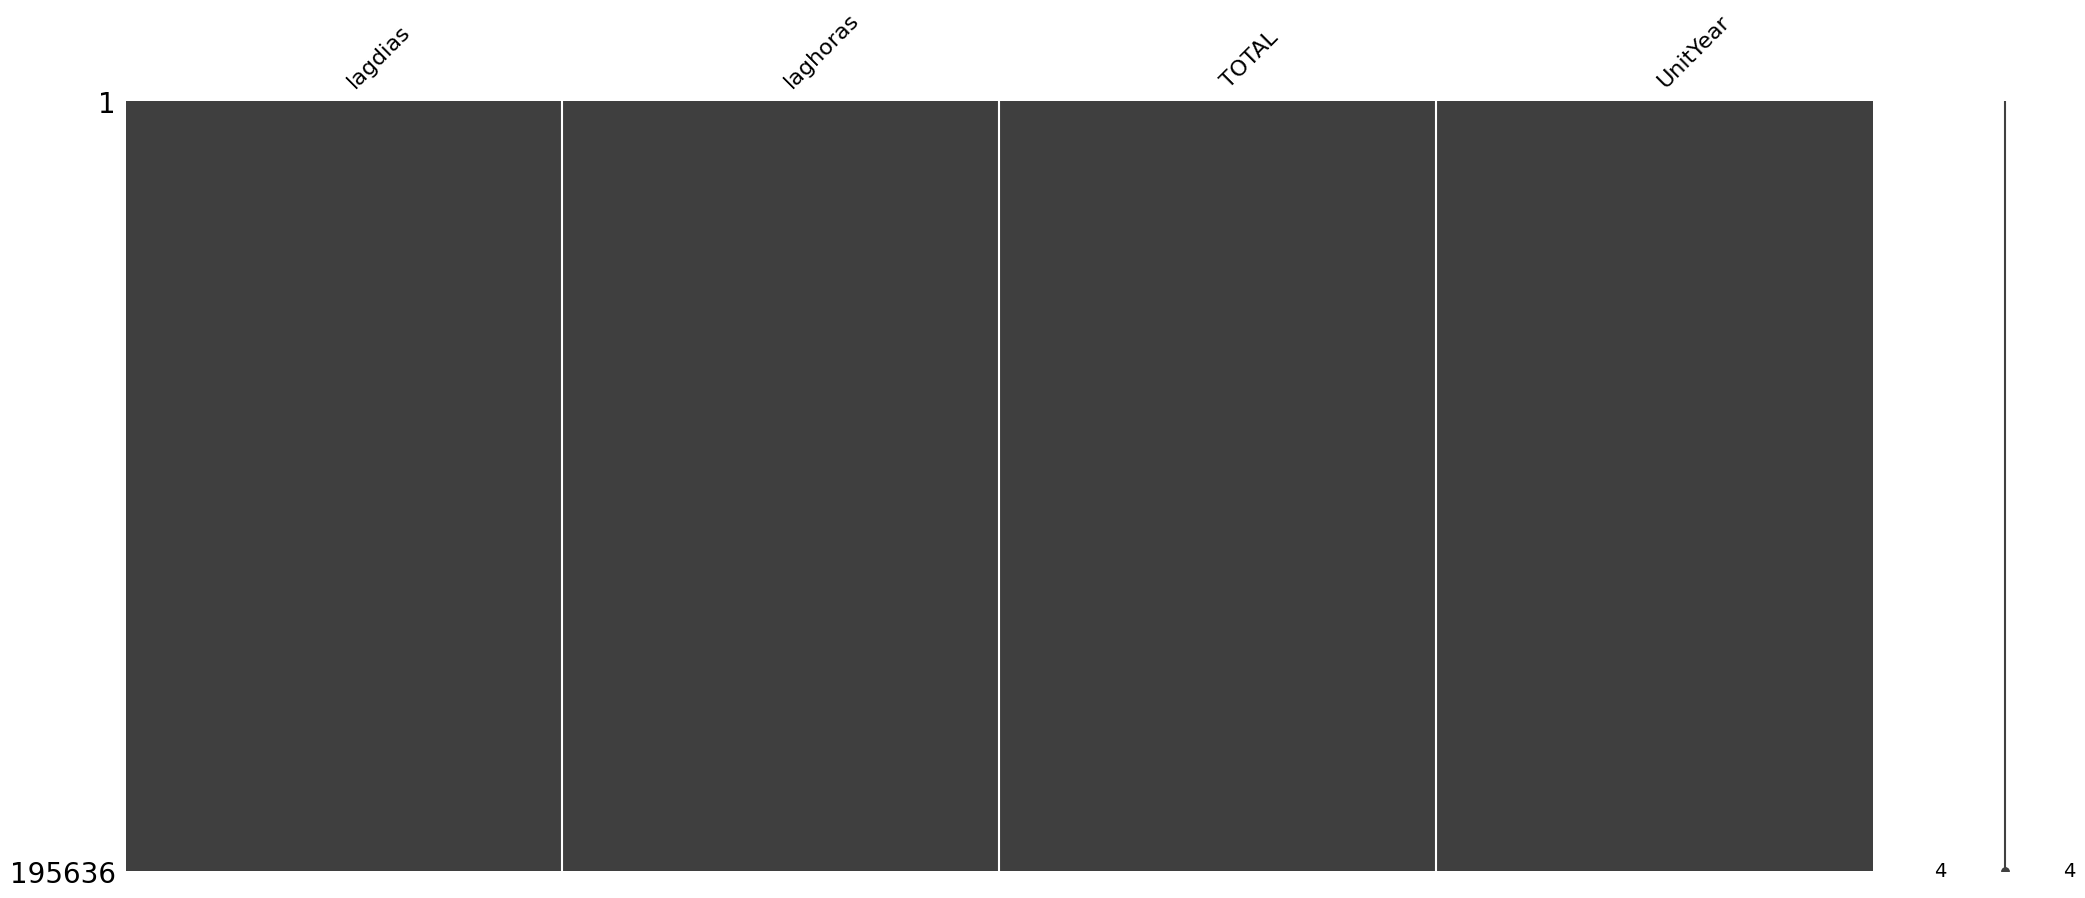

In [381]:
msno.matrix(data_descript[['lagdias', 'laghoras', 'TOTAL', 'UnitYear']])
#No hay notoria presencia de valores null

<Axes: >

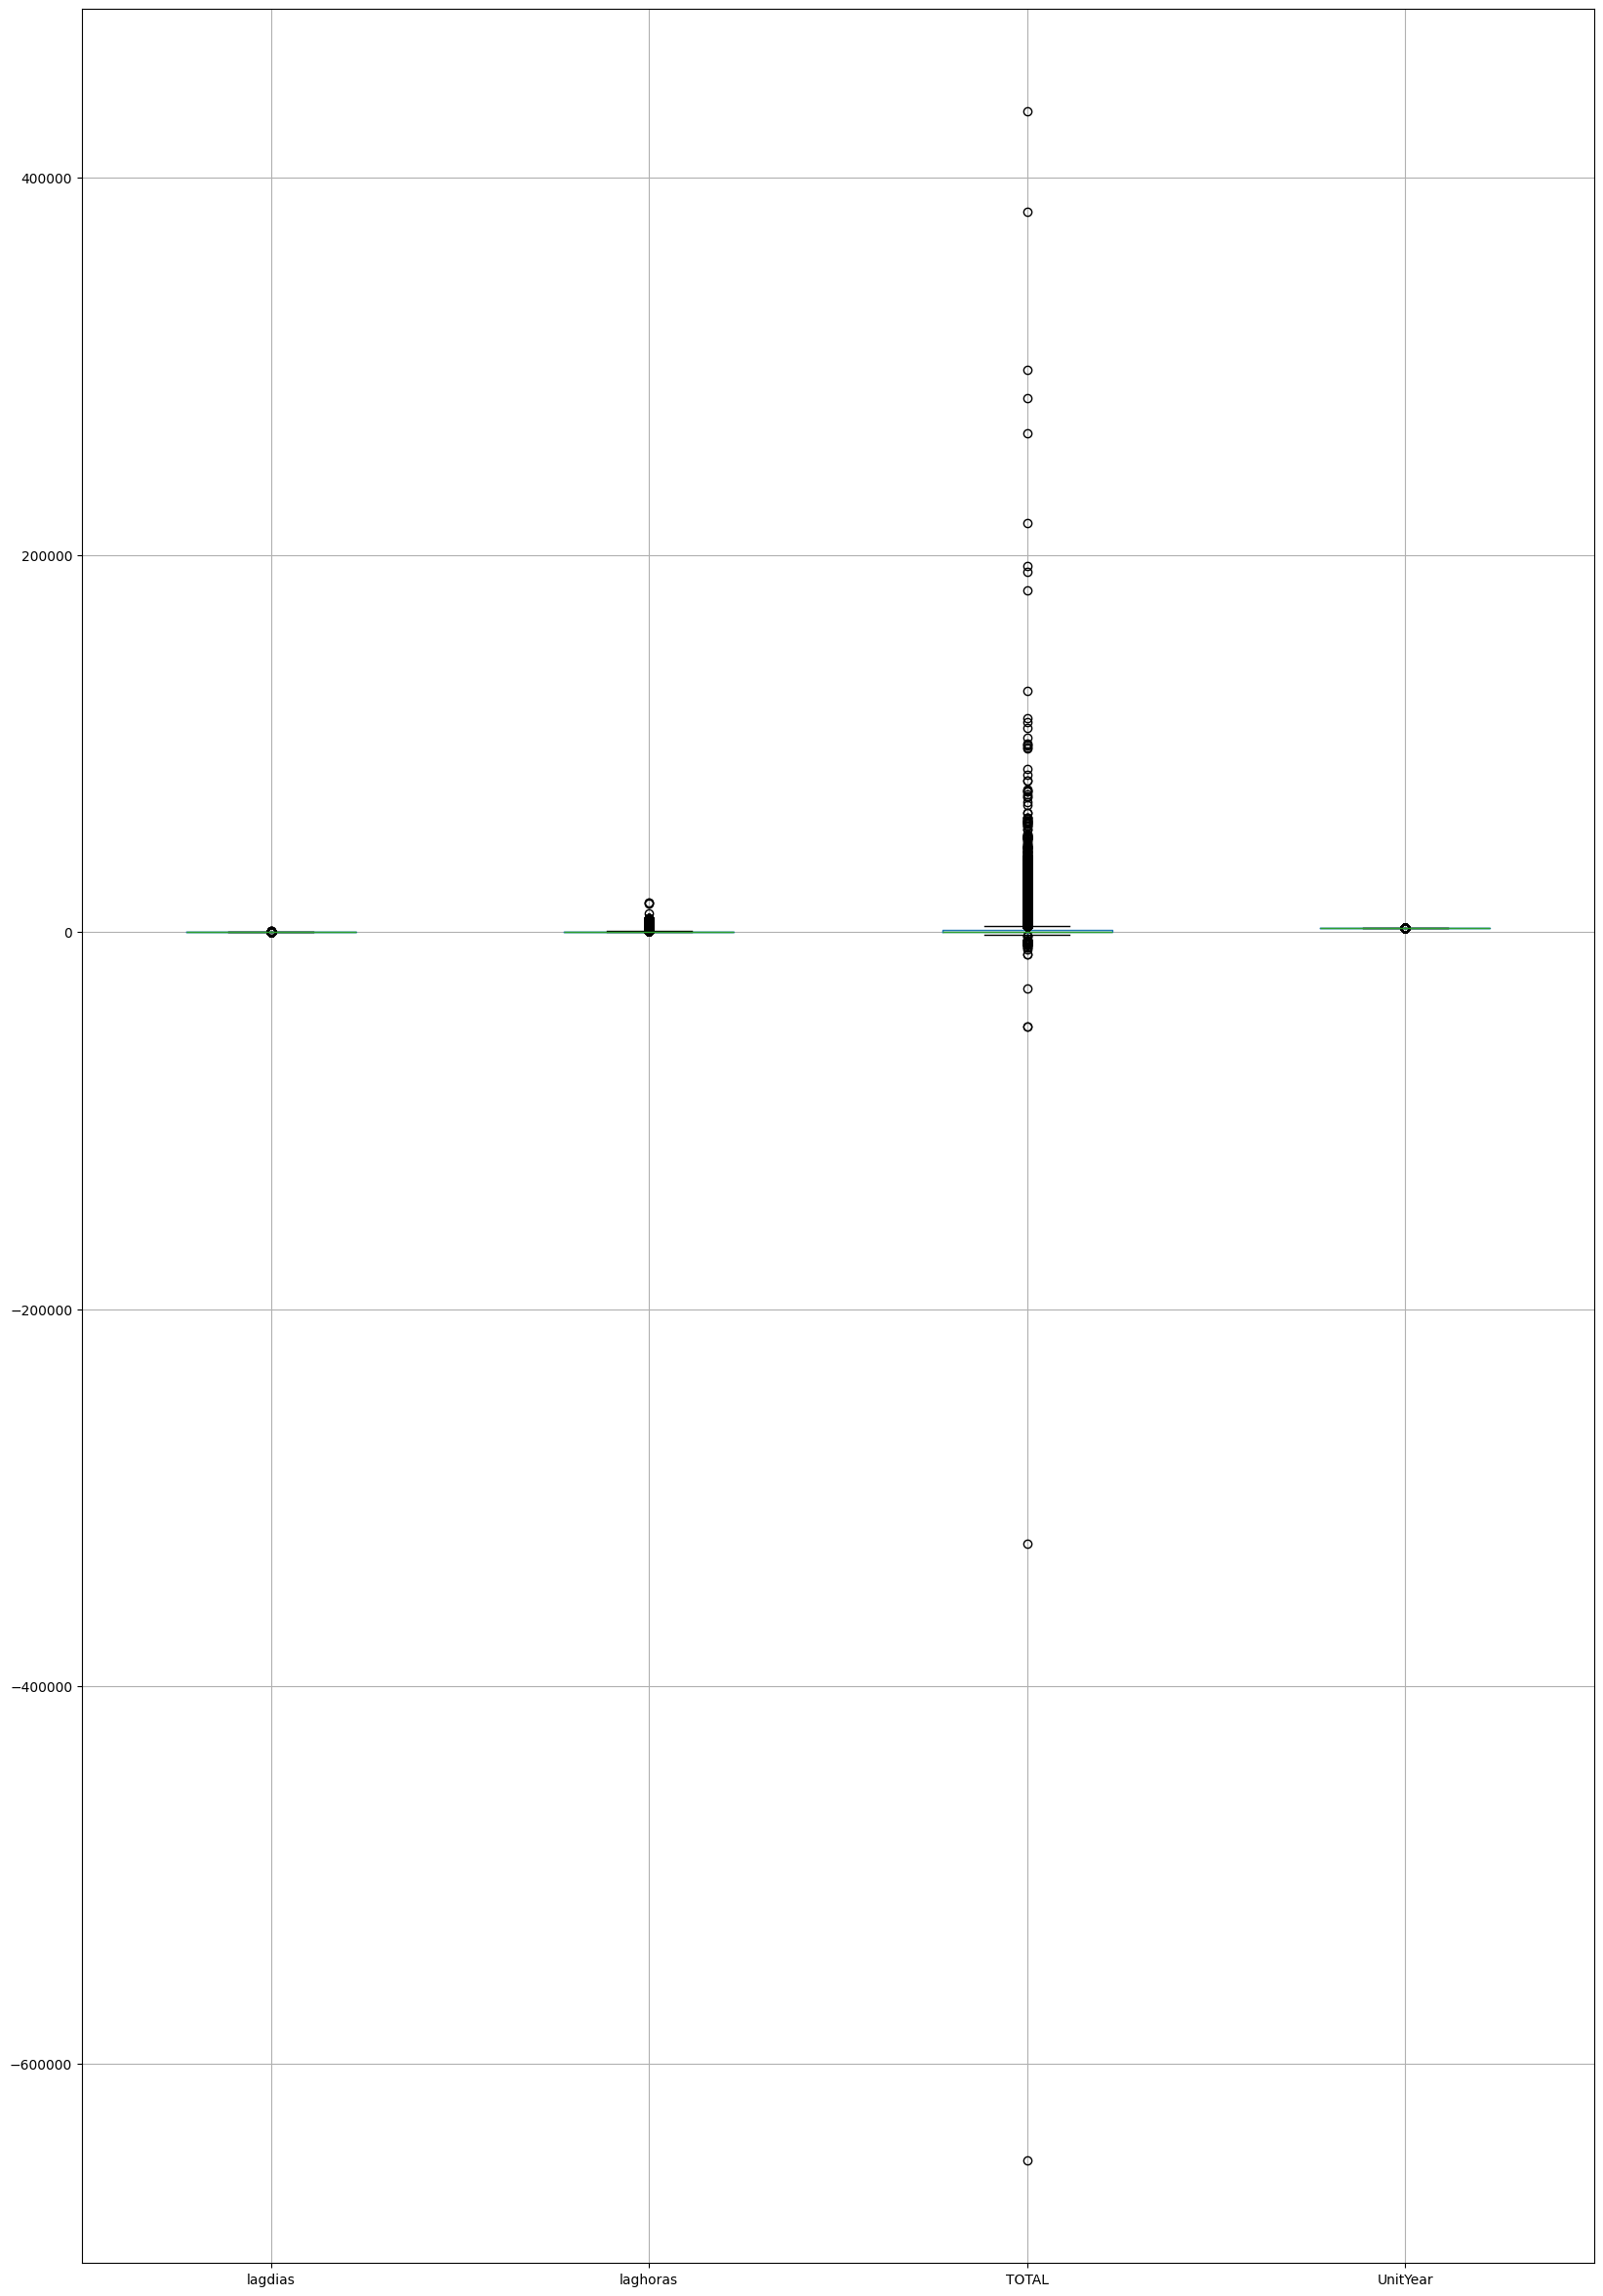

In [382]:
data_descript.boxplot(figsize = (20,30))
#El costo total de una reparación presenta la mayor cantidad de outliers, valores extremos
#Es importante consultar si estos valores son correctos, o pudiera tratarse de un error, de lo contrario se deberían eliminarse o imputarse

#El resto de variables no presentan tantos valores extremos

array([[<Axes: title={'center': 'TOTAL'}>]], dtype=object)

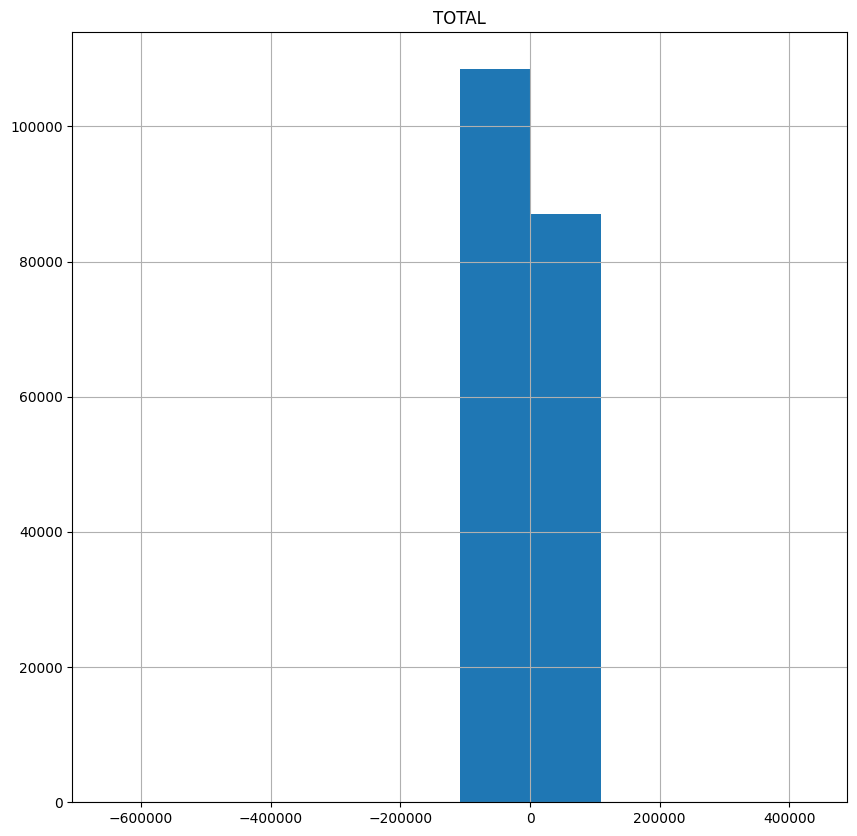

In [383]:
#Histograma para analizar la variable más dispersa, TOTAL

data_descript.hist(['TOTAL'], figsize = (10,10))

**Estadística descripctiva de variables categóricas**

In [384]:
# Estadística descripctiva de variables categóricas
data_descript.describe(include='object')

,RepReason,UnitType,TipoLinea,CITA
count,195636,195636,190605,190605
unique,113,6,3,7
top,PM,TRACTOR,PART,SIN CITA
freq,55754,138455,116132,111491


In [385]:
# Valores más repetidos en las variables cuantitativas
dataquant = data_descript.select_dtypes(include=object)

for i in range(dataquant.shape[1]):
  print(dataquant.iloc[:,i].value_counts().head(5))
  print()

RepReason
PM              55754
MC              44130
OTROS           13888
LAVADO          12066
ENLLANTADO       8794
Name: count, dtype: int64

UnitType
TRACTOR         138455
TRAILER          50727
DOLLY             5857
TORTHON            527
HERRAMIENTA         65
Name: count, dtype: int64

TipoLinea
PART            116132
SERVICES         71440
LABOR             3033
Name: count, dtype: int64

CITA
SIN CITA        111491
CON CITA         49477
EXPRES           13230
                 10970
CITA A TIEMP      4328
Name: count, dtype: int64



Identificar si hay columnas comunes en los dataframes empleados que permitan “enlazar” los registros en las siguientes fases.

**Debido a que solo utilizamos un dataframe para esta parte inicial del proyecto, no contamos con columnas por las que se pueda enlazar a otros dataframes. A futuro sería posible que tengamos más de uno que sí valdría la pena enlazar a traves de llaves o columnas en común.**

# **Selección y limpieza de datos**

## Eliminar las columnas no relevantes

Columna|Justificacion
------|--------------
Column| No sabemos que es
Taller| Viene implicito en el OrderID (nuestro index)
ClosedDate| Tenemos una metrica mas precisa (laghoras)
ClosedDay| ""
ClosedMonth| ""
ClosedYear| ""
OpenedDay| Tenemos una metrica mas general (OpenedDate)
OpenedMonth| ""
OpenedYear| ""
CreatedBy| No afecta realmente quien inicio la orden de reparacion
ClosedBy| No afecta realmente quien cerro la orden de reparacion
OrderType| Solo existen 2 tipos 'Standard' & 'Vendor'. Asumimos que no tiene efecto en la reparacion
Supplier| No afecta realmente de donde se obtuvo la pieza de reparacion
**COMPCDKEY**| **No sabemos si tiene utilidad o no**
**COMPCODE**| **No sabemos si tiene utilidad o no**
DESCRIP| Tiene informacion demasiado especifica para cada caso, no nos seria util
QTYRCVD| No afecta realmente si se daño 1 o mas piezas, si no, que fallaron
QTYREQD| Similar al anterior.
CHGAMT| Lo importante es la metrica del costo por reparacion (TOTAL)
TAXAMT| ""
SUBTOTAL| ""
EC| No afecta realmente el equipo administrativo del proyecto
ReasonType| Segun el diccionario de datos, no aporta informacion relevante
FechaPromesa| No genera impacto en la reparacion
Estimate| " "
CompleteDay| Tenemos una metrica mas precisa (laghoras)
CompleteMonth| ""
CompleteYear| ""
CompleteDate| ""
MECHANIC| Asumimos que no genera impacto en la reparacion quien la hizo

In [386]:
# Seleccionar sólo las columnas relevantes para las estadisticas
data_filtered_cols = data.drop(['Column', 'Taller', 'ClosedDate', 'Status',
                   'ClosedDay', 'ClosedMonth', 'ClosedYear', 'OpenedDay', 'OpenedMonth', 'OpenedYear',
                   'CreatedBy', 'ClosedBy', 'OrderType', 'Supplier', 'COMPCDKEY', 'COMPCODE',
                   'DESCRIP', 'QTYRCVD', 'QTYREQD', 'CHGAMT', 'TAXAMT', 'SUBTOTAL', 'EC',
                   'ReasonType', 'FechaPromesa', 'Estimate', 'CompleteDay',
                   'CompleteMonth', 'CompleteYear', 'CompleteDate', 'MECHANIC'], axis=1)

data_filtered_cols.sample(10)

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,UnitType,UnitYear,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA
OrderID,,,,,,,,,,,,,,,
SAAP-0006751,NaN,2024-05-02 10:42:00,31,745,OTROS,842.090,501,TRACTOR,1989,Available ...,PM,000032 - Consumibles,PART,RFGAS349,SIN CITA
MEX-00055794,303586.0,2024-04-16 10:05:00,3,80,PM,4827.240,1862,TRACTOR,2023,Circuitos ...,PREVENT VENC,000043 - Servicio Preventivo C - LT,PART,85W-140,CITA A TIEMP
VIL-00006720,556394.0,2024-02-14 20:37:00,6,139,MC,7875.000,1814,TRACTOR,2021,Wm Sencillo ...,CORRECTIVO,000013 - Correctivo Tractos,SERVICES,NaN,CON CITA
QRO-00037570,NaN,2022-10-12 13:31:00,0,0,OUT CAJA,1120.690,53442,TRAILER,2015,Available ...,PM,000035 - Out Arrastre,SERVICES,NaN,SIN CITA
QRO-00046195,750.0,2024-08-21 09:35:00,5,121,IN TRACTOR,18.230,2018,TRACTOR,2024,Available ...,PM,000034 - In Tractor,PART,TU320PA,SIN CITA
SAAP-0000706,NaN,2022-02-18 11:36:00,6,149,MC,270.000,10190,TRAILER,2016,Sayer Full ...,CORRECT CAJA,000014 - Correctivo Cajas,PART,RFLODRR21,SIN CITA
MEX-00027007,608237.0,2022-04-02 10:01:00,30,725,MC,321.340,1612,TRACTOR,2019,In&Out ...,CORRECTIVO,000013 - Correctivo Tractos,PART,DEXRON III,CON CITA
MEX-00038123,40702.0,2023-03-14 11:39:00,3,69,PM,622.300,1899,TRACTOR,2023,Full Liver ...,PREVENT VENC,000041 - Servicio Preventivo A - LT,PART,2510993C2,SIN CITA
VIL-00005472,620472.0,2023-08-08 11:18:00,0,1,MC,300.000,1736,TRACTOR,2020,Wm Full ...,CORRECTIVO,000013 - Correctivo Tractos,SERVICES,NaN,SIN CITA


In [387]:
data_filtered_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195636 entries, MEX-00024316 to QRO-00046374
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   kMS         135430 non-null  float64       
 1   OpenedDate  195636 non-null  datetime64[ns]
 2   lagdias     195636 non-null  int64         
 3   laghoras    195636 non-null  int64         
 4   RepReason   195636 non-null  object        
 5   TOTAL       195636 non-null  float64       
 6   UnitID      195636 non-null  object        
 7   UnitType    195636 non-null  object        
 8   UnitYear    195636 non-null  int64         
 9   Flota       195636 non-null  object        
 10  COMPLAINT   195636 non-null  object        
 11  Jobcode     195636 non-null  object        
 12  TipoLinea   190605 non-null  object        
 13  NumParte    116136 non-null  object        
 14  CITA        190605 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64

In [388]:
data_filtered_cols.isnull().sum()

kMS           60206
OpenedDate        0
lagdias           0
laghoras          0
RepReason         0
TOTAL             0
UnitID            0
UnitType          0
UnitYear          0
Flota             0
COMPLAINT         0
Jobcode           0
TipoLinea      5031
NumParte      79500
CITA           5031
dtype: int64

## Limpieza de las columnas (Trim)

Notamos que algunas de las columnas extraidas desde el archivo .csv tenian espacios en blanco que deben ser removidos para evitar complicaciones mas adelante en la agrupacion y filtrado de informacion. Es por eso que se procedera a arreglar dichos errores en la captura de la informacion

In [389]:
data_filtered_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195636 entries, MEX-00024316 to QRO-00046374
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   kMS         135430 non-null  float64       
 1   OpenedDate  195636 non-null  datetime64[ns]
 2   lagdias     195636 non-null  int64         
 3   laghoras    195636 non-null  int64         
 4   RepReason   195636 non-null  object        
 5   TOTAL       195636 non-null  float64       
 6   UnitID      195636 non-null  object        
 7   UnitType    195636 non-null  object        
 8   UnitYear    195636 non-null  int64         
 9   Flota       195636 non-null  object        
 10  COMPLAINT   195636 non-null  object        
 11  Jobcode     195636 non-null  object        
 12  TipoLinea   190605 non-null  object        
 13  NumParte    116136 non-null  object        
 14  CITA        190605 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64

In [390]:
data_filtered_cols.head(5)

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,UnitType,UnitYear,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA
OrderID,,,,,,,,,,,,,,,
MEX-00024316,691550.0,2022-01-07 11:13:00,0,0,PM,232.360,1491,TRACTOR,2018,In&Out ...,PREVENT VENC,000019 - Servicio preventivo A,PART,FF2200,CON CITA
MEX-00024316,691550.0,2022-01-07 11:13:00,0,0,PM,124.120,1491,TRACTOR,2018,In&Out ...,PREVENT VENC,000019 - Servicio preventivo A,PART,AF27958,CON CITA
MEX-00024316,691550.0,2022-01-07 11:13:00,0,0,PM,366.410,1491,TRACTOR,2018,In&Out ...,PREVENT VENC,000019 - Servicio preventivo A,PART,LF14001NN,CON CITA
MEX-00024316,691550.0,2022-01-07 11:13:00,0,0,PM,255.340,1491,TRACTOR,2018,In&Out ...,PREVENT VENC,000019 - Servicio preventivo A,PART,P550853,CON CITA
MEX-00024316,691550.0,2022-01-07 11:13:00,0,0,PM,2323.934,1491,TRACTOR,2018,In&Out ...,PREVENT VENC,000019 - Servicio preventivo A,PART,15W-40,CON CITA


In [391]:
# Trim 'RepReason' column
data_filtered_cols['RepReason'] = data_filtered_cols['RepReason'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['RepReason'].value_counts().index[0:5]

Index(['PM', 'MC', 'OTROS', 'LAVADO', 'ENLLANTADO'], dtype='object', name='RepReason')

In [392]:
# Trim 'UnitType' column
data_filtered_cols['UnitType'] = data_filtered_cols['UnitType'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['UnitType'].value_counts().index

Index(['TRACTOR', 'TRAILER', 'DOLLY', 'TORTHON', 'HERRAMIENTA', 'AUTOU'], dtype='object', name='UnitType')

In [393]:
# Trim 'Flota' column
data_filtered_cols['Flota'] = data_filtered_cols['Flota'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['Flota'].value_counts().index[0:5]

Index(['In&Out', 'Circuitos', 'Available', 'Liverpool Local', 'Wm Full'], dtype='object', name='Flota')

In [394]:
# Trim 'COMPLAINT' column
data_filtered_cols['COMPLAINT'] = data_filtered_cols['COMPLAINT'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['COMPLAINT'].value_counts().index[0:5]

Index(['PREVENT VENC', 'CORRECTIVO', 'PM', 'SUCIO', 'DESGASTADO'], dtype='object', name='COMPLAINT')

In [395]:
# Trim 'Jobcode' column
data_filtered_cols['Jobcode'] = data_filtered_cols['Jobcode'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['Jobcode'].value_counts().index[0:5]

Index(['000013 - Correctivo Tractos',
       '000005 - Servicio Preventivo Caja Seca A1',
       '000029 - Servicio De Lavado', '000058 - Preventivo Llantas',
       '000059 - Correctivo Llantas'],
      dtype='object', name='Jobcode')

In [396]:
# Trim 'TipoLinea' column
data_filtered_cols['TipoLinea'] = data_filtered_cols['TipoLinea'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['TipoLinea'].value_counts().index

Index(['PART', 'SERVICES', 'LABOR'], dtype='object', name='TipoLinea')

In [397]:
# Trim 'NumParte' column
data_filtered_cols['NumParte'] = data_filtered_cols['NumParte'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['NumParte'].value_counts().index[0:5]

Index(['KS481', 'AHS', '15W-40', 'RFTRA444', 'G CHASIS E-LIT GRAMOS'], dtype='object', name='NumParte')

In [398]:
# Trim 'CITA' column
data_filtered_cols['CITA'] = data_filtered_cols['CITA'].str.strip()
# Verificar que se haya hecho correctamente
data_filtered_cols['CITA'].value_counts().index

Index(['SIN CITA', 'CON CITA', 'EXPRES', '', 'CITA A TIEMP', 'CITA TARDE',
       'SCHEDULED'],
      dtype='object', name='CITA')

Para la ultima columna 'CITA' se observa que existen registros con un campo vacio, por lo que se procede a sustituir este campo N/A por un texto de referencia (DESCONOCIDO)

In [399]:
# Sustituir valores de 'CITA' con un string vacio por 'Desconocido'
data_filtered_cols['CITA'] = data_filtered_cols['CITA'].replace('', 'DESCONOCIDO')
# Verificar que se haya hecho correctamente
data_filtered_cols['CITA'].value_counts().index

Index(['SIN CITA', 'CON CITA', 'EXPRES', 'DESCONOCIDO', 'CITA A TIEMP',
       'CITA TARDE', 'SCHEDULED'],
      dtype='object', name='CITA')

## Restablecer los índices con identificadores adecuados.

La columna OrderID ya ha sido colocada como el índice del dataframe, y de esta manera resulta útil para el análisis.

## Seleccionar o filtrar los registros u observaciones de interés
Con la finalidad de operar dataframes de menor complejidad.

Dado el proyecto asignado al equipo, nos centraremos en la informacion sobre todas las reparaciones de la flota 'Sayer', por lo que deberemos filtrar dicha informacion.

In [400]:
# Extraemos la informacion del proyecto Sayer Full
data_sayer = data_filtered_cols[data_filtered_cols['Flota'] == 'Sayer Full'][:]
data_sayer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7695 entries, QRO-00032562 to SAAP-0007305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kMS         4169 non-null   float64       
 1   OpenedDate  7695 non-null   datetime64[ns]
 2   lagdias     7695 non-null   int64         
 3   laghoras    7695 non-null   int64         
 4   RepReason   7695 non-null   object        
 5   TOTAL       7695 non-null   float64       
 6   UnitID      7695 non-null   object        
 7   UnitType    7695 non-null   object        
 8   UnitYear    7695 non-null   int64         
 9   Flota       7695 non-null   object        
 10  COMPLAINT   7695 non-null   object        
 11  Jobcode     7695 non-null   object        
 12  TipoLinea   7515 non-null   object        
 13  NumParte    5246 non-null   object        
 14  CITA        7515 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memo

## Identificar valores faltantes y eliminarlos
(Tambien se pueden imputar según la naturaleza de la omisión. Justificar cada caso.)

In [401]:
data_sayer[['kMS', 'TipoLinea', 'CITA', 'NumParte']].isnull().sum()

kMS          3526
TipoLinea     180
CITA          180
NumParte     2449
dtype: int64

In [402]:
filas_null = data_sayer[data_sayer.isnull().any(axis=1)]
filas_null

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,UnitType,UnitYear,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA
OrderID,,,,,,,,,,,,,,,
SAAP-0000448,NaN,2022-01-05 10:12:00,9,217,DAÑO OP,1466.92,10191,TRAILER,2016,Sayer Full,DESGASTADO,-,PART,GRL11R22.5,SIN CITA
QRO-00032631,NaN,2022-01-05 09:00:00,14,343,PM,185.22,10190,TRAILER,2016,Sayer Full,PM,000029 - Servicio De Lavado,SERVICES,NaN,CON CITA
SAAP-0000463,NaN,2022-01-07 10:02:00,0,5,RENOVADO,2933.84,10173,TRAILER,2016,Sayer Full,DESGASTADO,-,PART,GRL11R22.5,DESCONOCIDO
SAAP-0000465,NaN,2022-01-07 10:07:00,14,339,RENOVADO,5867.68,10207,TRAILER,2018,Sayer Full,DESGASTADO,-,PART,GRL11R22.5,DESCONOCIDO
QRO-00032732,NaN,2022-01-14 09:50:00,0,3,RENOVADO,1680.20,10176,TRAILER,2016,Sayer Full,DESGASTADO,000058 - Preventivo Llantas,PART,GRL11R22.5,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TA-000020872,715119.0,2024-07-23 10:25:00,0,0,ordersec.REPREASON jr,0.00,1808,TRACTOR,2021,Sayer Full,ORDERSEC.COMPLAINT jr,000053 - Auxilio Carretero - Mecánico,NaN,NaN,NaN
SAAP-0007185,NaN,2024-07-29 13:19:00,2,48,ordersec.REPREASON jr,0.00,D-2188,DOLLY,2022,Sayer Full,ORDERSEC.COMPLAINT jr,000018 - Correctivo Dolly,NaN,NaN,NaN
QRO-00046083,728399.0,2024-08-01 09:48:00,0,0,ordersec.REPREASON jr,0.00,1808,TRACTOR,2021,Sayer Full,ORDERSEC.COMPLAINT jr,-,NaN,NaN,NaN


In [403]:
data_sayer['CITA'] = data_sayer['CITA'].fillna('DESCONOCIDO')
data_sayer['CITA'].isnull().sum()

np.int64(0)

In [404]:
data_sayer['TipoLinea'] = data_sayer['TipoLinea'].fillna('DESCONOCIDO')
data_sayer['TipoLinea'].isnull().sum()

np.int64(0)

In [405]:
data_sayer['NumParte'] = data_sayer['NumParte'].fillna('DESCONOCIDO')
data_sayer['NumParte'].isnull().sum()

np.int64(0)

In [406]:
data_sayer.isnull().sum()

kMS           3526
OpenedDate       0
lagdias          0
laghoras         0
RepReason        0
TOTAL            0
UnitID           0
UnitType         0
UnitYear         0
Flota            0
COMPLAINT        0
Jobcode          0
TipoLinea        0
NumParte         0
CITA             0
dtype: int64

## Detectar valores atípicos para su posterior transformación.


<Axes: >

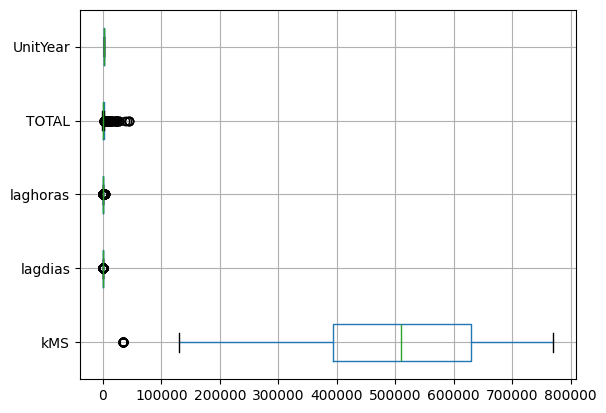

In [407]:
data_sayer.boxplot(vert=False)
#Observamos que en la columna de TOTAL es la que aparentemente hay mas datos
#atipicos, por lo que vamos a anilizarla a detalle


<Axes: >

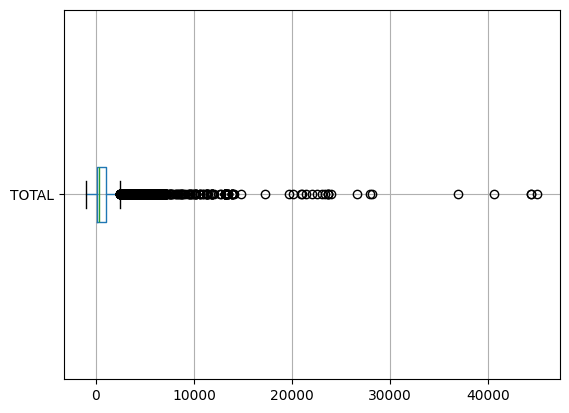

In [408]:
data_sayer[['TOTAL']].boxplot(vert=False)

In [409]:
data_sayer.describe()

,kMS,OpenedDate,lagdias,laghoras,TOTAL,UnitYear
count,4169.000000,7695,7695.000000,7695.000000,7695.000000,7695.000000
mean,498126.607340,2023-06-04 23:49:43.437322752,3.831059,93.498116,1084.940021,2019.863418
min,34105.000000,2022-01-03 13:34:00,-2.000000,-48.000000,-991.320000,2016.000000
25%,392846.000000,2022-10-12 13:21:00,0.000000,3.000000,60.340000,2019.000000
50%,510565.000000,2023-06-15 16:31:00,1.000000,25.000000,260.090000,2021.000000
75%,629765.000000,2024-01-22 17:38:30,5.000000,118.000000,1027.855000,2021.000000
max,770460.000000,2024-09-03 16:21:00,152.000000,3640.000000,45000.000000,2022.000000
std,151714.655346,NaN,8.890931,213.481538,2314.565872,2.133431


In [410]:
data_sayer[data_sayer['TOTAL'] > 30000]

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,UnitType,UnitYear,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA
OrderID,,,,,,,,,,,,,,,
QRO-00039294,496657.0,2022-12-23 11:07:00,6,149,MC,36912.29,1803,TRACTOR,2021,Sayer Full,CORRECTIVO,000013 - Correctivo Tractos,PART,4099730C94,SIN CITA
QRO-00043015,538111.0,2023-09-13 15:37:00,2,42,MC,45000.00,1808,TRACTOR,2021,Sayer Full,CORRECTIVO,000013 - Correctivo Tractos,SERVICES,DESCONOCIDO,CON CITA
QRO-00043451,NaN,2023-10-13 15:00:00,19,452,MC,40600.00,D-2165,DOLLY,2022,Sayer Full,CORREC DOLLY,000018 - Correctivo Dolly,PART,RFLAN1781,SIN CITA
QRO-00045391,NaN,2024-05-23 10:21:00,23,554,ACC-NO-REPO,44379.98,D-2172,DOLLY,2022,Sayer Full,PM,000026 - Accidente,PART,FW35S10504-2L,SIN CITA
QRO-00045676,668716.0,2024-06-26 13:28:00,2,48,MC,44379.98,1800,TRACTOR,2021,Sayer Full,CORRECTIVO,000013 - Correctivo Tractos,PART,FW35S10504-2L,SIN CITA


In [411]:
# Masks
bajos = data_sayer['TOTAL'] <= 0 #consideramos que no es congruente que la columna de total tenga valores negativos

altos = data_sayer['TOTAL'] >= 30000 #consideramos que es posbile que una reparacion sea
#bastante costosa de manera que consideramos mantener los datos elevados, exeptuando,
#los que ya estan muy alejados que podemos ver en la grafica que son mas de 30000


valores_atipicos = bajos | altos
valores_atipicos.sum()

np.int64(541)

In [412]:
data_sayer_clean = data_sayer[~valores_atipicos]
data_sayer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7154 entries, QRO-00032562 to QRO-00046364
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kMS         3873 non-null   float64       
 1   OpenedDate  7154 non-null   datetime64[ns]
 2   lagdias     7154 non-null   int64         
 3   laghoras    7154 non-null   int64         
 4   RepReason   7154 non-null   object        
 5   TOTAL       7154 non-null   float64       
 6   UnitID      7154 non-null   object        
 7   UnitType    7154 non-null   object        
 8   UnitYear    7154 non-null   int64         
 9   Flota       7154 non-null   object        
 10  COMPLAINT   7154 non-null   object        
 11  Jobcode     7154 non-null   object        
 12  TipoLinea   7154 non-null   object        
 13  NumParte    7154 non-null   object        
 14  CITA        7154 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memo

<Axes: >

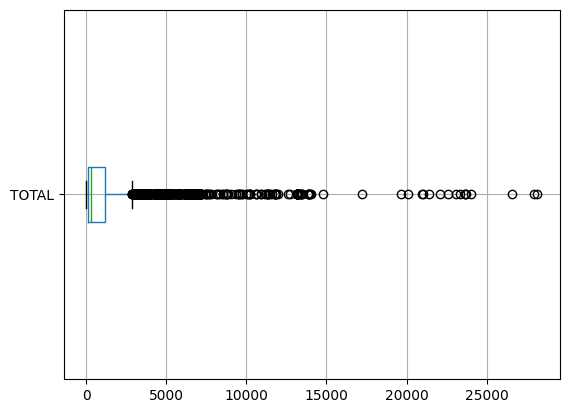

In [413]:
data_sayer_clean[['TOTAL']].boxplot(vert=False)

<Axes: >

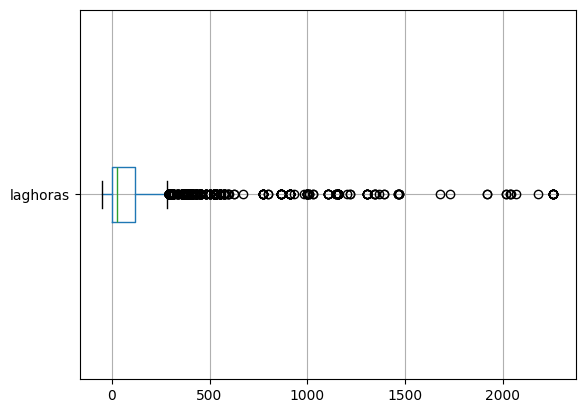

In [414]:
data_sayer_clean[['laghoras']].boxplot(vert=False)

In [415]:
data_sayer_clean[data_sayer_clean['laghoras'] < 0]

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,UnitType,UnitYear,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA
OrderID,,,,,,,,,,,,,,,
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,60.00,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,LABOR,DESCONOCIDO,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,2043.03,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,57122-002,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,176.23,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RFCON0801,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,468.91,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RFUNI1345,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,136.54,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RFFOC012,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,2.87,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RFFUS0673,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,1.45,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RF195TER0,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,8.45,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,RFTER206,EXPRES
QRO-00043240,427592.0,2023-10-04 09:34:00,-2,-48,MC,36.54,1834,TRACTOR,2021,Sayer Full,CORRECTIVO,-,PART,7493_REL,EXPRES


In [416]:
data_sayer_clean['laghoras'].describe()

count    7154.000000
mean       91.031032
std       190.256972
min       -48.000000
25%         3.000000
50%        25.000000
75%       118.000000
max      2259.000000
Name: laghoras, dtype: float64

In [417]:
bajos = data_sayer_clean['laghoras'] <= 0 #consideramos que no es congruente
#que la columna de lagdias tenga valores negativos

altos = data_sayer_clean['laghoras'] >= 2259 #la reparacion es probable que
#lleve bastantes dias, de manera que consideramos dejar los datos de dias mas grandes


valores_atipicos = bajos | altos
valores_atipicos.sum()

np.int64(765)

In [418]:
data_sayer_clean = data_sayer_clean[~valores_atipicos]
data_sayer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6389 entries, QRO-00032562 to SAAP-0007347
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kMS         3469 non-null   float64       
 1   OpenedDate  6389 non-null   datetime64[ns]
 2   lagdias     6389 non-null   int64         
 3   laghoras    6389 non-null   int64         
 4   RepReason   6389 non-null   object        
 5   TOTAL       6389 non-null   float64       
 6   UnitID      6389 non-null   object        
 7   UnitType    6389 non-null   object        
 8   UnitYear    6389 non-null   int64         
 9   Flota       6389 non-null   object        
 10  COMPLAINT   6389 non-null   object        
 11  Jobcode     6389 non-null   object        
 12  TipoLinea   6389 non-null   object        
 13  NumParte    6389 non-null   object        
 14  CITA        6389 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memo

<Axes: >

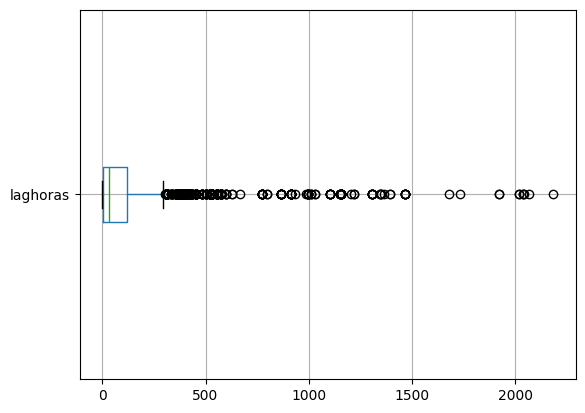

In [419]:
data_sayer_clean[['laghoras']].boxplot(vert=False)

<Axes: >

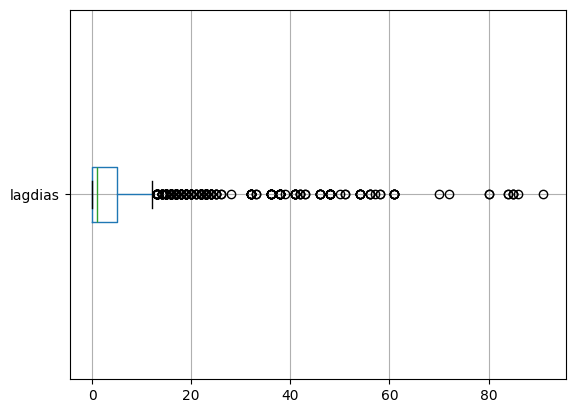

In [420]:
data_sayer_clean[['lagdias']].boxplot(vert=False) #Al eliminar lo negativos de dias se eliminaron tambien
#los de horas

In [421]:
data_sayer_clean['lagdias'].describe()

count    6389.000000
mean        4.029582
std         7.471836
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        91.000000
Name: lagdias, dtype: float64

In [422]:
data_sayer_clean.describe() #eliminamos los valores que consideramos atipicos

,kMS,OpenedDate,lagdias,laghoras,TOTAL,UnitYear
count,3469.000000,6389,6389.000000,6389.000000,6389.000000,6389.000000
mean,495330.040069,2023-06-09 02:32:24.510877952,4.029582,98.500235,1118.738764,2019.884802
min,34105.000000,2022-01-03 13:34:00,0.000000,1.000000,0.090000,2016.000000
25%,396903.000000,2022-10-14 17:58:00,0.000000,5.000000,84.390000,2019.000000
50%,510974.000000,2023-06-28 13:00:00,1.000000,34.000000,300.000000,2021.000000
75%,620065.000000,2024-01-11 13:58:00,5.000000,121.000000,1200.000000,2021.000000
max,770460.000000,2024-09-02 15:20:00,91.000000,2183.000000,28156.220000,2022.000000
std,148809.331361,NaN,7.471836,179.208020,2090.902083,2.118264


<Axes: >

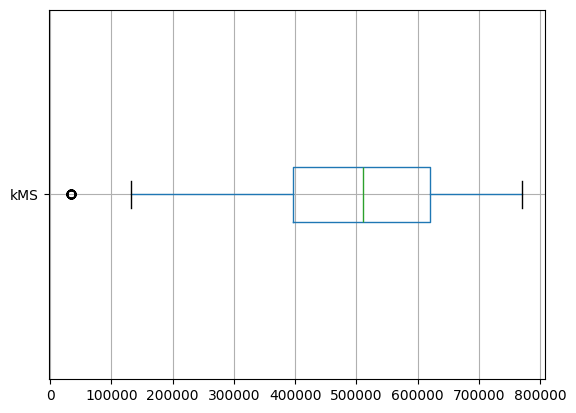

In [423]:
data_sayer_clean[['kMS']].boxplot(vert=False)

In [424]:
bajos = data_sayer_clean['kMS'].isna()

valores_atipicos = bajos
valores_atipicos.sum()

np.int64(2920)

In [425]:
data_sayer_clean = data_sayer_clean.fillna(data_sayer_clean['kMS'].median())
data_sayer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6389 entries, QRO-00032562 to SAAP-0007347
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kMS         6389 non-null   float64       
 1   OpenedDate  6389 non-null   datetime64[ns]
 2   lagdias     6389 non-null   int64         
 3   laghoras    6389 non-null   int64         
 4   RepReason   6389 non-null   object        
 5   TOTAL       6389 non-null   float64       
 6   UnitID      6389 non-null   object        
 7   UnitType    6389 non-null   object        
 8   UnitYear    6389 non-null   int64         
 9   Flota       6389 non-null   object        
 10  COMPLAINT   6389 non-null   object        
 11  Jobcode     6389 non-null   object        
 12  TipoLinea   6389 non-null   object        
 13  NumParte    6389 non-null   object        
 14  CITA        6389 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memo

In [426]:
data_sayer_clean['kMS'].describe()

count      6389.000000
mean     502479.885585
std      109921.244031
min       34105.000000
25%      492345.000000
50%      510974.000000
75%      528716.000000
max      770460.000000
Name: kMS, dtype: float64

In [427]:
data_sayer = data_sayer_clean

## Eliminar registros duplicados.

In [428]:
# Cantidad de elementos en el df
data_sayer.index.size

6389

In [429]:
# Cantidad de elementos en el df si se eliminan las filas con informacion identica
data_sayer.drop_duplicates().index.size

6072

Haciendo una resta simple, podemos calcular que actualmente existen $6389-6072 = 317$ duplicados. Esto añade un gran sesgo al análisis posterior, por lo que se procede a eliminarlos.

In [430]:
data_sayer.drop_duplicates(inplace=True)

In [431]:
data_sayer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6072 entries, QRO-00032562 to SAAP-0007347
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kMS         6072 non-null   float64       
 1   OpenedDate  6072 non-null   datetime64[ns]
 2   lagdias     6072 non-null   int64         
 3   laghoras    6072 non-null   int64         
 4   RepReason   6072 non-null   object        
 5   TOTAL       6072 non-null   float64       
 6   UnitID      6072 non-null   object        
 7   UnitType    6072 non-null   object        
 8   UnitYear    6072 non-null   int64         
 9   Flota       6072 non-null   object        
 10  COMPLAINT   6072 non-null   object        
 11  Jobcode     6072 non-null   object        
 12  TipoLinea   6072 non-null   object        
 13  NumParte    6072 non-null   object        
 14  CITA        6072 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memo

# **Construcción y transformación de datos**

## Integrar los dataframes
Creando los enlaces o combinaciones relevantes al dominio o contexto del proyecto.

Debido a que sólo se ha estado utilizando un sólo dataframe para el proyecto, es que no es necesario realizar ningún enlade al dominio. Cabe resaltar que esta misma base de datos se ha sometido a distintas limpiezas y procesamientos para cumplir con los objetivos indicados en el entregable.

## Agregación y agrupamiento.
 Construir nuevas características o variables con las tecnicas descritas

Primero, vamos a agrupar los valores de la columna 'COMPLAINT' para separar los siguientes tipos de
mantenimiento:
* PREVENTIVO
* CORRECTIVO
* DESCONOCIDO

In [432]:
#Analizar los tipos de reparaciones que se realizan a los tractos más comunes
data_sayer['COMPLAINT'].value_counts().index

Index(['PM', 'CORRECTIVO', 'PREVENT VENC', 'CORRECT CAJA', 'CORREC DOLLY',
       'GASTADO', 'PONCHADO', 'ACCIDENTE', 'DESGASTADO', 'SUCIO', 'DESBALANCE',
       'REP LLANTA', 'FUGA', 'FALTA LLANTA', 'FALLA SUSPEN', 'DAÑO OP',
       'PIERDE POTEN', 'OTROS', 'FALLA ELECTR', 'SIS. DIRECC', 'LLANTA VOLAD',
       'ROTO', 'FALLA FRENOS', 'SE NEUTRALIZ', 'BAJA PRESION', 'DESGASTE IRR',
       'PRESIÓN BAJA', 'FALLA MOTOR', 'GOLPETEA', 'FALLA REFRIG', 'OTHER',
       'INOPERATIVO', 'ROBADA', 'QUEBRADO', 'JALA DERECHA', 'FALLA TRANS',
       'NO TRANSMITE', 'NO INFLA', 'SIN DIESEL', 'FALLA GPS', 'ACORTADO',
       'FALLA CHASIS', 'PERDIDO'],
      dtype='object', name='COMPLAINT')

In [433]:
# Añadir una nueva columna para identificar claramente los tipos de 'COMPLAINT'
# El valor por defecto de la columna sera 'CORRECTIVO' debido a que es el tipo de reparacion mas comun
data_sayer['ComplaintType'] = 'CORRECTIVO'

# Establecer en 'COMPLAINT' = 'PREVENTIVO' para los casos especficos que se pueden determinar
ComplaintTypePreventive = ['PM', 'PREVENT VENC', 'GASTADO', 'DESGASTADO', 'SUCIO', 'BAJA PRESION', 'PRESIÓN BAJA', 'GOLPETEA']
data_sayer.loc[data_sayer['COMPLAINT'].isin(ComplaintTypePreventive), 'ComplaintType'] = 'PREVENTIVO'
# Excepto para los casos que no se pueden determinar por ser demasiado ambiguos.
# Estos se clasificarán como 'DESCONOCIDO'
ComplaintTypeUnknown = ['DAÑO OP', 'SE NEUTRALIZ', 'DESGASTE IRR', 'JALA DERECHA', 'SIN DIESEL', 'ACORTADO', 'OTROS', 'OTHER']
data_sayer.loc[data_sayer['COMPLAINT'].isin(ComplaintTypeUnknown), 'ComplaintType'] = 'DESCONOCIDO'

In [434]:
# Muestreamos para verificar que el agrupamiento se haya hecho correctamente
data_sayer['ComplaintType'].value_counts()

ComplaintType
PREVENTIVO     3438
CORRECTIVO     2541
DESCONOCIDO      93
Name: count, dtype: int64

In [435]:
#¿Qué porcentaje representan los mantenimiento preventivos segun el ComplaintType respecto a todas las operaciones de mantenimiento?
percent = (data_sayer.groupby('ComplaintType')['ComplaintType'].count() / data_sayer.shape[0] * 100).round(2)
# Ordenar por porcentaje
percent = percent.sort_values(ascending=False)

# Imprimir los porcentajes de mantenimientos por tipo
for i in range(len(percent)):
    print(f" (Complaint Type) Los mantenimientos de tipo '{percent.index[i]}' representan el {percent.iloc[i]}% de todas las operaciones de mantenimiento.")


 (Complaint Type) Los mantenimientos de tipo 'PREVENTIVO' representan el 56.62% de todas las operaciones de mantenimiento.
 (Complaint Type) Los mantenimientos de tipo 'CORRECTIVO' representan el 41.85% de todas las operaciones de mantenimiento.
 (Complaint Type) Los mantenimientos de tipo 'DESCONOCIDO' representan el 1.53% de todas las operaciones de mantenimiento.


Posteriormente, vamos a agrupar los valores de la columna 'RepReason' para identificar los tipos de
mantenimiento:
* PREVENTIVO
* CORRECTIVO
* DESCONOCIDO

In [436]:
#Analizar los tipos de reparaciones que se realizan a los tractos más comunes
data_sayer['RepReason'].value_counts().index

Index(['MC', 'PM', 'OTROS', 'DAÑO OP', 'DESGASTE', 'ACC-REPORT', 'PERFORADA',
       'PONCHADURA', 'LAVADO', 'ACC-NO-REPO', 'IN TRACTOR', 'AMORTIGUADOR',
       'FUGA AIRE', 'ALR', 'FOCOS', 'BLC', 'BUJES', 'ENLLANTADO',
       'FUGA ACEITE', 'CAMBIO DAÑO', 'ROBO', 'BOLSA AIRE', 'RENOVADO',
       'FALTA PRESIÓ', '7 VÍAS DAÑAD', 'TORNILLERIA', 'BATERÍAS', 'IN CAJA',
       'CABLES', 'BATERÍA DAÑA', 'PATINES', 'VALVULA  REG', 'ROTOCHAMBER',
       'TAPA MAZA', 'VALVULA', 'TAMBOR', 'FLOTADOR URE', 'RTC', 'MANGUERA-FRE',
       'RIN', 'GOLPE', 'CORTO', 'VENTILADOR', 'BALEROS', 'TRANSMISION',
       'SIN DIESEL', 'ACEITE-MOTOR', 'FALLA GPS', 'MANITAS', 'MODIFICACION'],
      dtype='object', name='RepReason')

In [437]:
# Añadir una nueva columna para identificar claramente los tipos de 'COMPLAINT'
# El valor por defecto de la columna sera 'DESCONOCIDO' debido a que es el tipo de reparacion mas comun
# Lamentablemente, es muy ambigua la informacion en esta columna, por lo que tendremos que clasificarla como 'DESCONOCIDO'
data_sayer['RepReasonType'] = 'DESCONOCIDO'

# Establecer en 'COMPLAINT' = 'PREVENTIVO' para los casos especificos que se pueden determinar
ComplaintTypePreventive = ['PM', 'DESGASTE', 'LAVADO', 'FALTA PRESIÓ']
data_sayer.loc[data_sayer['RepReason'].isin(ComplaintTypePreventive), 'RepReasonType'] = 'PREVENTIVO'
# Establecer en 'COMPLAINT' = 'CORRECTIVO' para los casos especificos que se pueden determinar
ComplaintTypeCorrective = ['MC', 'PERFORADA', 'PONCHADURA', 'FUGA AIRE', 'FOCOS', 'FUGA ACEITE', 'CAMBIO DAÑO', 'ROBO', '7 VIAS DAÑAD', 'BATERÍA DAÑA', 'GOLPE', 'CORTO', 'FALLA GPS']
data_sayer.loc[data_sayer['RepReason'].isin(ComplaintTypeCorrective), 'RepReasonType'] = 'CORRECTIVO'

In [438]:
# Muestreamos para verificar que el agrupamiento se haya hecho correctamente
data_sayer['RepReasonType'].value_counts()

RepReasonType
CORRECTIVO     2122
PREVENTIVO     2010
DESCONOCIDO    1940
Name: count, dtype: int64

In [439]:
#¿Qué porcentaje representan los mantenimiento preventivos segun el ComplaintType respecto a todas las operaciones de mantenimiento?
percent = (data_sayer.groupby('RepReasonType')['RepReasonType'].count() / data_sayer.shape[0] * 100).round(2)
# Ordenar por porcentaje
percent = percent.sort_values(ascending=False)

# Imprimir los porcentajes de mantenimientos por tipo
for i in range(len(percent)):
    print(f" (RepReason Type) Los mantenimientos de tipo '{percent.index[i]}' representan el {percent.iloc[i]}% de todas las operaciones de mantenimiento.")

 (RepReason Type) Los mantenimientos de tipo 'CORRECTIVO' representan el 34.95% de todas las operaciones de mantenimiento.
 (RepReason Type) Los mantenimientos de tipo 'PREVENTIVO' representan el 33.1% de todas las operaciones de mantenimiento.
 (RepReason Type) Los mantenimientos de tipo 'DESCONOCIDO' representan el 31.95% de todas las operaciones de mantenimiento.


## Discretización o binning
Reagrupar atributos de alta cardinalidad mediante los metodos descritos

In [440]:
#Elegimos el metodo de discretizacion qcut ya que no tenemos rangos bien definidos
#de manera que con este metodo dividimos las variables en intervalos iguales,
#a lo cual tomamos 3 criterios, Reparacion_rapida, Reparacion_Normal y
#Reparacion_lenta con la finalidad de hacer mas descriptiva la variable de horas
# y tener nocion si la reparacion tomo demasiado tiempo o fue muy lenta
#Decidimos eligir la variable de horas, porque al analizar esta variable, observamos
#que es mas exacta que la variable dias, ya que esta ultima son dias enteros.

data_sayer['Clasif_rep'], cut_bin = pd.qcut(x=data_sayer['laghoras'],
                                    q=3,
                                    labels=['Reparacion_rapida','Reparacion_Normal','Reparacion_lenta'],
                                    retbins=True)
cut_bin

array([1.000e+00, 1.700e+01, 9.400e+01, 2.183e+03])

In [441]:
data_sayer['Clasif_rep'].value_counts()
#Observamos que lo dividio casi exactamente en 3 partes iguales

Clasif_rep
Reparacion_rapida    2050
Reparacion_Normal    2012
Reparacion_lenta     2010
Name: count, dtype: int64

In [442]:
#Similar al caso anterior, al no tener unos rangos bien definidos,
#nos decidimos por el metodo de qcut para dividirlo en 3 partes,Costo_bajo
# Costo_normal, Costo_elevado .

data_sayer['Clasif_costo'], cut_bin = pd.qcut(x=data_sayer['TOTAL'],
                                    q=3,
                                    labels=['Costo_bajo','Costo_normal','Costo_elevado'],
                                    retbins=True)
cut_bin

array([9.000000e-02, 1.250000e+02, 6.273500e+02, 2.815622e+04])

In [443]:
data_sayer['Clasif_costo'].value_counts()

Clasif_costo
Costo_bajo       2028
Costo_elevado    2024
Costo_normal     2020
Name: count, dtype: int64

## One-hot encoding
Para las variables **categóricas** que consideren necesarias.

In [444]:
data_sayer['CITA'] = data_sayer['CITA'].str.strip()
print(list(data_sayer['CITA'].value_counts().index))

['SIN CITA', 'CON CITA', 'EXPRES', 'DESCONOCIDO', 'CITA TARDE', 'CITA A TIEMP']


In [445]:
data_sayer['CITA'].replace([''], 'DESCONOCIDO', inplace=True)

/tmp/ipykernel_3937/3706502010.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sayer['CITA'].replace([''], 'DESCONOCIDO', inplace=True)


In [446]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [447]:
col_cat = data_sayer.select_dtypes(include=['object', 'category'])
col_cat.head(5)

,RepReason,UnitID,UnitType,Flota,COMPLAINT,Jobcode,TipoLinea,NumParte,CITA,ComplaintType,RepReasonType,Clasif_rep,Clasif_costo
OrderID,,,,,,,,,,,,,
QRO-00032562,MC,1801,TRACTOR,Sayer Full,CORRECTIVO,000013 - Correctivo Tractos,PART,BO3002200,CON CITA,CORRECTIVO,CORRECTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,PM,1801,TRACTOR,Sayer Full,PREVENT VENC,000041 - Servicio Preventivo A - LT,PART,LF14001NN,CON CITA,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,PM,1801,TRACTOR,Sayer Full,PREVENT VENC,000041 - Servicio Preventivo A - LT,PART,2510993C2,CON CITA,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_elevado
QRO-00032562,PM,1801,TRACTOR,Sayer Full,PREVENT VENC,000041 - Servicio Preventivo A - LT,PART,G CHASIS E-LIT GRAMOS,CON CITA,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,PM,1801,TRACTOR,Sayer Full,PREVENT VENC,000041 - Servicio Preventivo A - LT,PART,15W-40,CON CITA,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_elevado


In [448]:
from category_encoders import CountEncoder
# codificación por conteo
data_sayer = CountEncoder(cols=['CITA']).fit(data_sayer).transform(data_sayer)

In [449]:
from category_encoders import OneHotEncoder
# codificación por OneHot
data_sayer = OneHotEncoder(cols=['TipoLinea']).fit(data_sayer).transform(data_sayer)

In [450]:
from category_encoders import OneHotEncoder
# codificación por OneHot
data_sayer = OneHotEncoder(cols=['UnitType']).fit(data_sayer).transform(data_sayer)

In [451]:
data_sayer.rename(columns={'UnitType_1': 'TRACTOR', 'UnitType_2': 'TRAILER', 'UnitType_3': 'DOLLY', 'TipoLinea_1': 'PART', 'TipoLinea_2': 'SERVICES', 'TipoLinea_3': 'LABOR'}, inplace = True)
data_sayer

,kMS,OpenedDate,lagdias,laghoras,RepReason,TOTAL,UnitID,TRACTOR,TRAILER,DOLLY,...,Jobcode,PART,SERVICES,LABOR,NumParte,CITA,ComplaintType,RepReasonType,Clasif_rep,Clasif_costo
OrderID,,,,,,,,,,,,,,,,,,,,,
QRO-00032562,244708.0,2022-01-03 13:34:00,38,914,MC,443.260,1801,1,0,0,...,000013 - Correctivo Tractos,1,0,0,BO3002200,1409,CORRECTIVO,CORRECTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,244708.0,2022-01-03 13:34:00,38,914,PM,378.030,1801,1,0,0,...,000041 - Servicio Preventivo A - LT,1,0,0,LF14001NN,1409,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,244708.0,2022-01-03 13:34:00,38,914,PM,994.750,1801,1,0,0,...,000041 - Servicio Preventivo A - LT,1,0,0,2510993C2,1409,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_elevado
QRO-00032562,244708.0,2022-01-03 13:34:00,38,914,PM,162.459,1801,1,0,0,...,000041 - Servicio Preventivo A - LT,1,0,0,G CHASIS E-LIT GRAMOS,1409,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_normal
QRO-00032562,244708.0,2022-01-03 13:34:00,38,914,PM,2323.478,1801,1,0,0,...,000041 - Servicio Preventivo A - LT,1,0,0,15W-40,1409,PREVENTIVO,PREVENTIVO,Reparacion_lenta,Costo_elevado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAAP-0007337,510974.0,2024-08-30 12:32:00,4,92,FUGA AIRE,495.000,D-2168,0,0,1,...,000018 - Correctivo Dolly,0,1,0,DESCONOCIDO,3719,CORRECTIVO,CORRECTIVO,Reparacion_Normal,Costo_normal
QRO-00046340,712128.0,2024-08-31 08:57:00,2,55,CAMBIO DAÑO,72.000,1803,1,0,0,...,000062 - Daño Operativo Llanta,0,0,1,DESCONOCIDO,473,PREVENTIVO,CORRECTIVO,Reparacion_Normal,Costo_bajo
QRO-00046344,709372.0,2024-08-31 12:38:00,2,51,ACC-NO-REPO,693.320,1799,1,0,0,...,000026 - Accidente,0,0,1,DESCONOCIDO,473,CORRECTIVO,DESCONOCIDO,Reparacion_Normal,Costo_elevado


Para la parte de 'One-Hot Encoding' se decidio codificar unicamente 3 variables. 'CITA', 'TipoLinea', 'UnitType'.

Para las variables 'TipoLinea' y 'UnitType' se decidio codificar con OneHot ya que de esta manera será mucho mas facil encontrar y leer que tipo de unidad de esta manejando y que tipo de linea.

La variable 'CITA' se codificó con Count ya que de esta manera se podrá conocer la cantidad de registros por cada situación de las citas y así tener un mayor control.

## Feature transformation
Para las variables con valores atípicos identificados.

In [452]:
# Verificamos que columnas vamos a trabajar
# (Deben ser numericas, para poder transformarlas)
data_sayer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6072 entries, QRO-00032562 to SAAP-0007347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   kMS            6072 non-null   float64       
 1   OpenedDate     6072 non-null   datetime64[ns]
 2   lagdias        6072 non-null   int64         
 3   laghoras       6072 non-null   int64         
 4   RepReason      6072 non-null   object        
 5   TOTAL          6072 non-null   float64       
 6   UnitID         6072 non-null   object        
 7   TRACTOR        6072 non-null   int64         
 8   TRAILER        6072 non-null   int64         
 9   DOLLY          6072 non-null   int64         
 10  UnitYear       6072 non-null   int64         
 11  Flota          6072 non-null   object        
 12  COMPLAINT      6072 non-null   object        
 13  Jobcode        6072 non-null   object        
 14  PART           6072 non-null   int64         
 15  SERVICE

In [453]:
# Analizamos cual es el valor minimo para cada una, es muy importante
# para obtener el metodo para transformar
data_sayer.describe()

,kMS,OpenedDate,lagdias,laghoras,TOTAL,TRACTOR,TRAILER,DOLLY,UnitYear,PART,SERVICES,LABOR,CITA
count,6072.000000,6072,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000,6072.000000
mean,502668.169302,2023-06-10 12:29:20.474308352,4.107213,100.400692,967.877143,0.541502,0.317194,0.141304,2019.860507,0.727108,0.224473,0.048419,2657.009881
min,34105.000000,2022-01-03 13:34:00,0.000000,1.000000,0.090000,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000,0.000000,68.000000
25%,492900.750000,2022-10-17 17:35:15,0.000000,5.000000,80.010000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000,1409.000000
50%,510974.000000,2023-07-04 09:14:00,2.000000,39.000000,267.045000,1.000000,0.000000,0.000000,2021.000000,1.000000,0.000000,0.000000,3719.000000
75%,531871.000000,2024-01-15 16:21:00,5.000000,123.000000,1000.000000,1.000000,1.000000,0.000000,2021.000000,1.000000,0.000000,0.000000,3719.000000
max,770460.000000,2024-09-02 15:20:00,91.000000,2183.000000,28156.220000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,1.000000,3719.000000
std,110370.763501,NaN,7.604683,182.378323,1966.448545,0.498316,0.465422,0.348364,2.129819,0.445482,0.417269,0.214668,1376.029048


In [454]:
# Importamos una libreria para la visualizacion de la distribucion de los datos en nuestras columnas
# nominales
import matplotlib.pyplot as plt

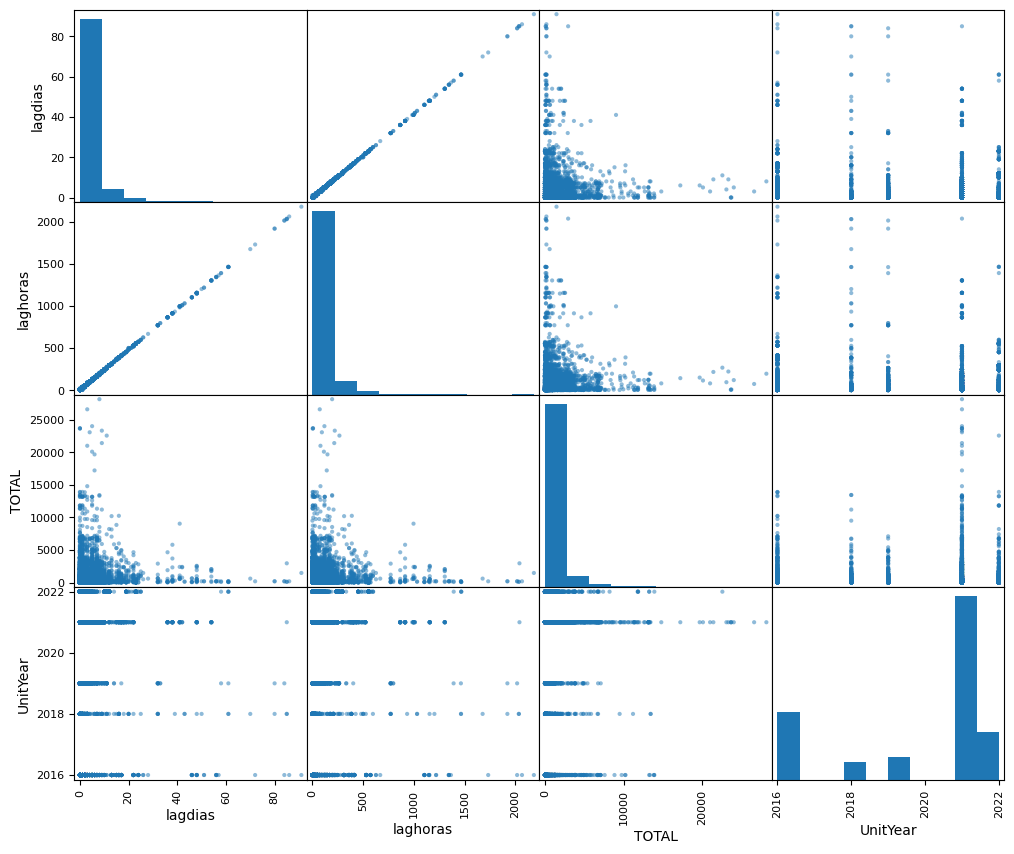

In [455]:
pd.plotting.scatter_matrix(data_sayer[['lagdias', 'laghoras', 'TOTAL', 'UnitYear']],
                           figsize=(12,10))
plt.show()

# Aqui debemos identificar aquellas que no tienen una distribucion normal, y que tenga sentidos aplicarlas
# una transformacion. En este caso, podriamos ocupar las variables 'dias, horas y TOTAL'

In [456]:
# Dada la naturaleza de nuestros datos, no seria posible aplicar una 'Transformada
# Logaritmica', porque contamos con valores entre 0 y 1.
# Ademas si intentamos utilizar un metodo como el de 'Box-Cox', nos daria un error
# en la ejecucion, pues este solo permite valores mayores a 1.
# Es por ello que nuestro unico metodo de transformacion plausible para utilizar
# seria el de Yeo-johnson, que acepta un rango de valores de negativos, positivos
# y 0.

import seaborn as sns
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

pow_trans = scaler.fit_transform(data_sayer[['lagdias', 'laghoras', 'TOTAL']])
data_sayer['pow_lagdias'] = pow_trans[:, 0]
data_sayer['pow_laghoras'] = pow_trans[:, 1]
data_sayer['pow_total'] = pow_trans[:, 2]

/home/user326/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pow LAGDIAS')

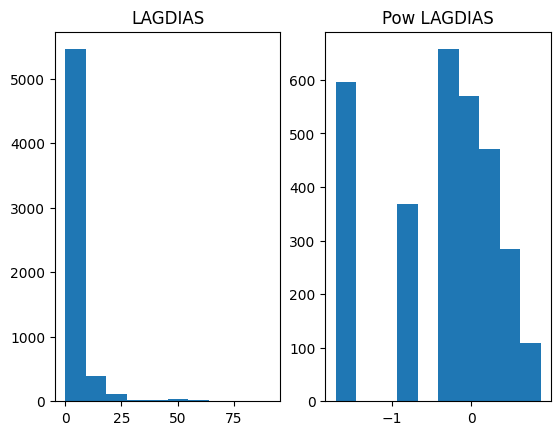

In [457]:
# Comparativa entre las distribuciones anteriores y posteriores a la transformacion
fig, ax = plt.subplots(1, 2)
ax[0].hist(data_sayer.lagdias)
ax[0].set_title('LAGDIAS')
ax[1].hist(np.log(data_sayer.pow_lagdias))
ax[1].set_title('Pow LAGDIAS')

Text(0.5, 1.0, 'Pow LAGHORAS')

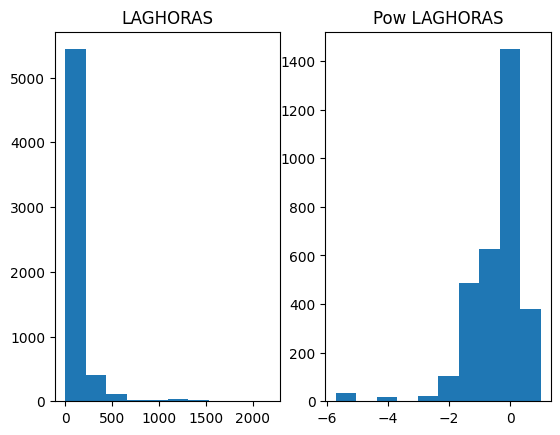

In [458]:
# Comparativa entre las distribuciones anteriores y posteriores a la transformacion
fig, ax = plt.subplots(1, 2)
ax[0].hist(data_sayer.laghoras)
ax[0].set_title('LAGHORAS')
ax[1].hist(np.log(data_sayer.pow_laghoras))
ax[1].set_title('Pow LAGHORAS')

Text(0.5, 1.0, 'Pow TOTAL')

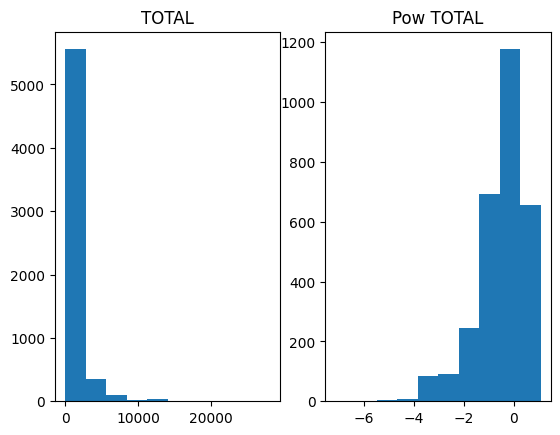

In [459]:
# Comparativa entre las distribuciones anteriores y posteriores a la transformacion
fig, ax = plt.subplots(1, 2)
ax[0].hist(data_sayer.TOTAL)
ax[0].set_title('TOTAL')
ax[1].hist(np.log(data_sayer.pow_total))
ax[1].set_title('Pow TOTAL')

Text(0.5, 1.0, 'Pow Transformed data')

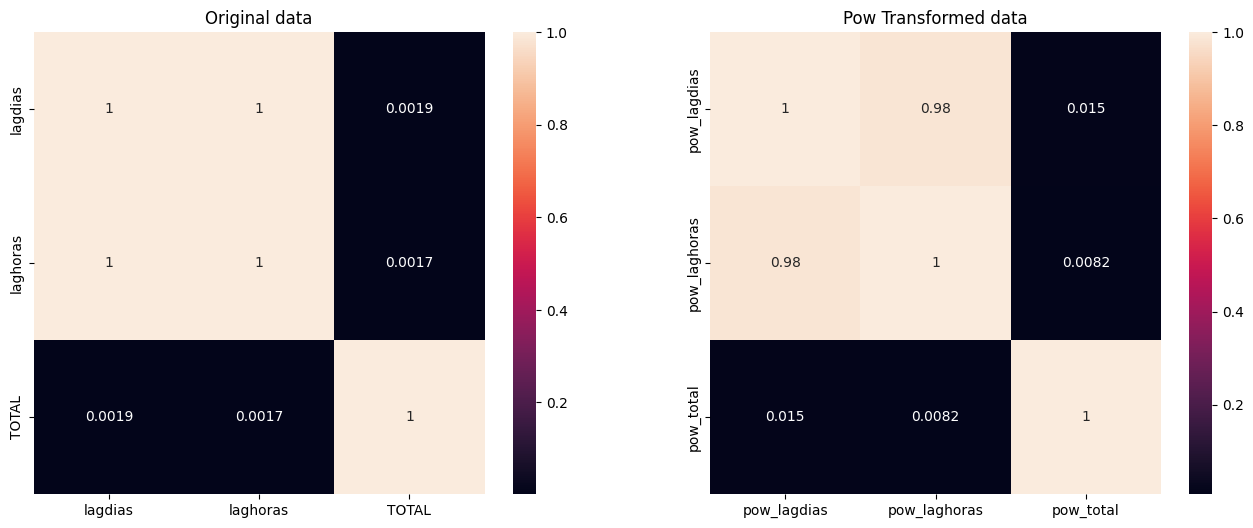

In [462]:
# Finalmente hacemos una comparativa con su covarianza, para afirmar el incremento
# entre la variabilidad entre una y otra
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
sns.heatmap(data_sayer[['lagdias', 'laghoras', 'TOTAL']].corr(), annot=True, ax=ax1).set_title('Original data')
sns.heatmap(data_sayer[['pow_lagdias', 'pow_laghoras', 'pow_total']].corr(), annot=True, ax=ax2).set_title('Pow Transformed data')

# RESULTADOS OBTENIDOS

En este entregable se logró encontrar el porcentaje significativo del número de rescates en carretera respecto al total.

Además, se clasificaron las reparaciones realizadas acorde a su periodo de tiempo, y los costos de las mismas según su rango.

Por último, se trabajaron los valores atípicos afirmando el incremento entre la variabilidad de los valores importantes para el proyecto.

# Convertir a HTML

In [461]:
%%shell
jupyter nbconvert --to html /content/E5_Construcción_y_transformación_de_datos.ipynb

UsageError: Cell magic `%%shell` not found.
